# [RQ1]

In [87]:
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt

## Import the team data

In [88]:

team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,"{'name': 'Germany', 'id': '276', 'alpha3code':...",club
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [89]:
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
team=team[:98]
team.head()

,city,name,wyId,officialName,type,name,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


#### Note that column 2 and column 9 are both called 'name'

In [90]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


#### Adding necessary filters

In [91]:
#As this is premier league, we need information solely based on England.
team=team[(team['alpha3code']=='XEN')&(team['type']=='club')|(team['name']=='Swansea City')]
team.head()

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
19,Swansea,Swansea City,10531,Swansea City AFC,club,Wales,0,XWA,
26,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,club,England,0,XEN,
27,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,club,England,0,XEN,
39,"Burnley, Lancashire",Burnley,1646,Burnley FC,club,England,0,XEN,
54,Leicester,Leicester City,1631,Leicester City FC,club,England,0,XEN,
55,London,West Ham United,1633,West Ham United FC,club,England,0,XEN,
56,Stoke-on-Trent,Stoke City,1639,Stoke City FC,club,England,0,XEN,
60,Watford,Watford,1644,Watford FC,club,England,0,XEN,


#### Note that the index is not increasing by 1, instead it is 0, 8, 26 ...

#### This can be problematic in case this dataframe is merged/joined/concatinated to some other dataframe as these functions work on the basis of indices

In [92]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team=team.reset_index(drop=True)
team

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
2,Swansea,Swansea City,10531,Swansea City AFC,club,Wales,0,XWA,
3,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,club,England,0,XEN,
4,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,club,England,0,XEN,
5,"Burnley, Lancashire",Burnley,1646,Burnley FC,club,England,0,XEN,
6,Leicester,Leicester City,1631,Leicester City FC,club,England,0,XEN,
7,London,West Ham United,1633,West Ham United FC,club,England,0,XEN,
8,Stoke-on-Trent,Stoke City,1639,Stoke City FC,club,England,0,XEN,
9,Watford,Watford,1644,Watford FC,club,England,0,XEN,


##  Import the matches data

In [93]:
matches= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_England.json')
pd.set_option('display.max_columns', 14)
matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405654,1,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",181150,2017-08-12 14:00:00,1623,Goodison Park,2499723,"Everton - Stoke City, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364
376,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364
377,Played,4405654,1,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",181150,2017-08-12 14:00:00,1627,The Hawthorns,2499728,"West Bromwich Albion - AFC Bournemouth, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 379443, 'role': 'referee'}, {'r...",Regular,364
378,Played,4405654,1,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",181150,2017-08-12 11:30:00,0,Vicarage Road Stadium,2499727,"Watford - Liverpool, 3 - 3","August 12, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364


#### ${\bullet}$ Split the columns 'label' to extract the information of the teams and scores of the match

In [94]:
results = matches.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results
# results.columns = ['result_home','result_away']
results = pd.concat([matches['gameweek'],results,matches.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results

,gameweek,goal_home,goal_away,team_home,team_away
0,38,1,2,Burnley,AFC Bournemouth
1,38,2,0,Crystal Palace,West Bromwich Albion
2,38,0,1,Huddersfield Town,Arsenal
3,38,4,0,Liverpool,Brighton & Hove Albion
4,38,1,0,Manchester United,Watford
...,...,...,...,...,...
375,1,1,0,Everton,Stoke City
376,1,0,0,Southampton,Swansea City
377,1,1,0,West Bromwich Albion,AFC Bournemouth
378,1,3,3,Watford,Liverpool


#### ${\bullet}$ Generating the points table for the entire league

In [95]:
results['points_home'] = 0
results['points_away'] = 0
for i in range(results.shape[0]):
    if results.loc[i,'goal_home']>results.loc[i,'goal_away']:
        results.loc[i,'points_home']=3
    elif results.loc[i,'goal_home']<results.loc[i,'goal_away']:
        results.loc[i,'points_away']=3
    else:
        results.loc[i,'points_home']=1
        results.loc[i,'points_away']=1

In [96]:
home = results[['gameweek','team_home','points_home']]
away = results[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table

,gameweek,team,points
0,1,AFC Bournemouth,0
1,1,Arsenal,3
2,1,Brighton & Hove Albion,0
3,1,Burnley,3
4,1,Chelsea,0
...,...,...,...
755,38,Swansea City,0
756,38,Tottenham Hotspur,3
757,38,Watford,0
758,38,West Bromwich Albion,0


####  ${\bullet}$re-arranging the points table as a matrix containing the information of points of all teams over the weeks  

In [97]:
team_list = list(points_table.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table.loc[(points_table['gameweek']==week)&(points_table['team']==team),'points'])
table=points_byweek
table=table.sort_values(by=(38),ascending=False)
table=table.T
pd.set_option('display.max_columns', 20)
table

,Manchester City,Manchester United,Tottenham Hotspur,Liverpool,Chelsea,Arsenal,Burnley,Everton,Leicester City,Newcastle United,AFC Bournemouth,Crystal Palace,West Ham United,Watford,Brighton & Hove Albion,Huddersfield Town,Southampton,Stoke City,Swansea City,West Bromwich Albion
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,3,3,1,0,3,3,3,0,0,0,0,0,1,0,3,1,0,1,3
2,4,6,3,4,3,3,3,4,3,0,0,0,0,4,0,6,4,3,1,6
3,7,9,4,7,6,3,4,4,3,3,0,0,0,5,1,7,5,4,4,7
4,10,10,7,7,9,6,7,4,3,6,0,0,3,8,4,7,5,5,4,7
5,13,13,8,8,10,7,8,4,4,9,3,0,4,8,4,8,8,5,5,8
6,16,16,11,11,13,10,9,7,4,9,3,0,4,11,7,9,8,5,5,8
7,19,19,14,12,13,13,12,7,5,10,4,0,7,12,7,9,8,8,5,9
8,22,20,17,13,13,13,13,8,6,11,4,3,8,15,8,9,9,8,8,10
9,25,20,20,13,16,16,13,8,9,14,7,3,8,15,11,12,12,8,8,10


# Reserach Question: Who wants to be a Champion?

####  ${\bullet}$Plotting the above table to observe the trend

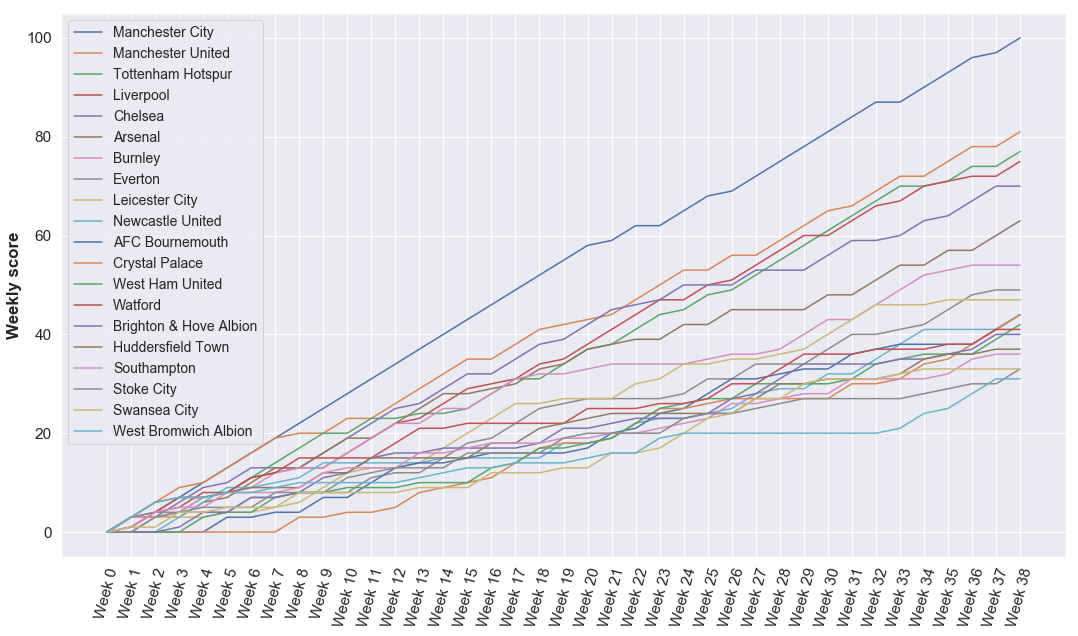

In [104]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

#### Finding the longest winning and losing streak:

##### Finding the longest winning streak:

##### To calculate the longest winning streak, we use the data set 'Points_table' to obtain the longest winning streak. The 'points_table' dataset has been declared previously in this analysis. If you see the dataset, the column gameweek is defined weekly, i.e. it shows the entire outcomes of the first week and move to the second week and so on. Here we just reconstruct the data and represent it team wise.

In [105]:
rest={}
for i in points_table.team.unique():
    t = list(points_table.where(points_table.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    


In [106]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
10,Manchester City,18
16,Tottenham Hotspur,7
4,Chelsea,4
8,Leicester City,4
9,Liverpool,4
11,Manchester United,4
12,Newcastle United,3
3,Burnley,3
1,Arsenal,3
18,West Bromwich Albion,2


##### Finding the longest losing streak:

##### To calculate the longest losing streak, we use the data set 'Points_table' to obtain the longest winning streak. The 'points_table' dataset has been declared previously in this analysis. If you see the dataset, the column gameweek is defined weekly, i.e. it shows the entire outcomes of the first week and move to the second week and so on. Here we just reconstruct the data and represent it team wise.

In [107]:
result={}
for i in points_table.team.unique():
    t = list(points_table.where(points_table.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [108]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
18,West Bromwich Albion,8
5,Crystal Palace,7
7,Huddersfield Town,5
0,AFC Bournemouth,4
17,Watford,4
15,Swansea City,4
14,Stoke City,4
12,Newcastle United,4
1,Arsenal,3
13,Southampton,3


### From the data and the plot we can see that the team which has the longest winning streak is Manchester city. Manchester city made a winning chain of 18 matches. On the other hand, the  team with highest losing streak is West Bromwich Albion.

# [RQ4]

In [109]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Research Question: Find the top 10 players with the highest ratio between completed passes and attempted passes.

#### Import the players dataset

In [110]:
players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,"{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",72,Ali,,Ma\u00e2loul,16041,1990-01-01,175,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",120839,left,A. Ma\u00e2loul,null
3599,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",76,Carlos Alberto,,C\u00e1ceda Oyaguez,15591,1991-09-27,183,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114736,right,C. C\u00e1ceda,null
3600,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114908,right,M. Araujo,null
3601,"{'name': 'Morocco', 'id': 504, 'alpha3code': '...",70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Morocco', 'id': 504, 'alpha3code': '...",285583,right,A. Tagnaouti,null


#### Import the event data for England

In [111]:
events=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_England.json")
pd.set_option('display.max_columns', 15)
events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [112]:
events['eventName']=events['eventName'].astype(str)
events=events[(events.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643134,8,Simple pass,[{'id': 1801}],8313,"[{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]",2500098,Pass,1633,2H,2760.286946,85,251596219
643135,8,Simple pass,[{'id': 1801}],379209,"[{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]",2500098,Pass,1633,2H,2763.698599,85,251596221
643141,8,Simple pass,[{'id': 1801}],8561,"[{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]",2500098,Pass,1633,2H,2783.137836,85,251596225
643142,8,High pass,[{'id': 1801}],20620,"[{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]",2500098,Pass,1633,2H,2785.702032,83,251596226


#### Splitting the column 'Tags' that is a dictionary

In [113]:
TAG1=[]
for i in range(len(events.tags)):
    try:
        TAG1.append(str(events.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events.tags)):
    try:
        TAG2.append(str(events.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events.tags)):
    try:
        TAG3.append(str(events.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events.tags)):
    try:
        TAG4.append(str(events.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events=[events,TAG]
events=pd.concat(mix_events,  axis=1,  sort=False).reindex(events.index)
events=events.drop('tags',axis=1)
events.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,25413.0,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719.0,Pass,1609.0,1H,2.758649,85,177959171.0,1801,Notag,Notag,Notag
1,8.0,High pass,370224.0,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719.0,Pass,1609.0,1H,4.946850,83,177959172.0,1801,Notag,Notag,Notag
2,8.0,Head pass,3319.0,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719.0,Pass,1609.0,1H,6.542188,82,177959173.0,1801,Notag,Notag,Notag
3,8.0,Head pass,120339.0,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719.0,Pass,1609.0,1H,8.143395,82,177959174.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,167145.0,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719.0,Pass,1609.0,1H,10.302366,85,177959175.0,1801,Notag,Notag,Notag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643134,8.0,Simple pass,8313.0,"[{'y': 63, 'x': 65}, {'y': 96, 'x': 61}]",2500098.0,Pass,1633.0,2H,2760.286946,85,251596219.0,NaN,NaN,NaN,NaN
643135,8.0,Simple pass,379209.0,"[{'y': 96, 'x': 61}, {'y': 85, 'x': 40}]",2500098.0,Pass,1633.0,2H,2763.698599,85,251596221.0,NaN,NaN,NaN,NaN
643141,8.0,Simple pass,8561.0,"[{'y': 70, 'x': 59}, {'y': 89, 'x': 53}]",2500098.0,Pass,1633.0,2H,2783.137836,85,251596225.0,NaN,NaN,NaN,NaN
643142,8.0,High pass,20620.0,"[{'y': 89, 'x': 53}, {'y': 72, 'x': 99}]",2500098.0,Pass,1633.0,2H,2785.702032,83,251596226.0,NaN,NaN,NaN,NaN


#### Counting the number of passes with respect to the player id

In [114]:
passes=events
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player['Numberofpasses'] = passes_player.groupby('PlayerId')['PlayerId'].transform('count')
passes_player

,PlayerId,Numberofpasses
0,25413.0,657
1,370224.0,574
2,3319.0,1790
3,120339.0,834
4,167145.0,1877
...,...,...
328652,8313.0,1203
328653,379209.0,549
328654,8561.0,1245
328655,20620.0,725


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [168]:
#calculating mean and standard deviation
Mean=passes_player.Numberofpasses.mean()
stdv=passes_player.Numberofpasses.std()
Mean=int(mean)
stdv=int(stdv)
#calculating lower bound
lower_bound=Mean-(sd*1.5)
ID_passes_threshold=[]
frequency_passes_threshold=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player.Numberofpasses)):
    frequency_passes.append(float(passes_player.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold.append(int(frequency_passes[i]))
        ID_passes_threshold.append(int(ID_passes[i]))


In [169]:
lower_bound

102.71506385279235

In [170]:
passes_threshold=pd.DataFrame(ID_passes_threshold, columns=['PlayerId'])
passes_threshold.insert(1, "Numberofpasses",frequency_passes_threshold, True)
passes_threshold.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold

,PlayerId,Numberofpasses
0,25413,657
1,370224,574
2,3319,1790
3,120339,834
4,167145,1877
...,...,...
233759,486252,226
234345,40765,104
256227,40787,140
261443,240032,167


In [171]:
events_tag2=events.loc[events['Tag2'] == '1801']
events_tag1=events.loc[events['Tag1']=='1801']
events_tag3=events.loc[events['Tag3']=='1801']
events_tag4=events.loc[events['Tag4']=='1801']
events_tag=[events_tag1,events_tag2,events_tag3,events_tag4]
success=pd.concat(events_tag, axis=0)
success.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,25413.0,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719.0,Pass,1609.0,1H,2.758649,85,177959171.0,1801,Notag,Notag,Notag
1,8.0,High pass,370224.0,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719.0,Pass,1609.0,1H,4.946850,83,177959172.0,1801,Notag,Notag,Notag
2,8.0,Head pass,3319.0,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719.0,Pass,1609.0,1H,6.542188,82,177959173.0,1801,Notag,Notag,Notag
3,8.0,Head pass,120339.0,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719.0,Pass,1609.0,1H,8.143395,82,177959174.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,167145.0,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719.0,Pass,1609.0,1H,10.302366,85,177959175.0,1801,Notag,Notag,Notag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328196,8.0,Cross,8976.0,"[{'y': 14, 'x': 95}, {'y': 54, 'x': 90}]",2499913.0,Pass,10531.0,1H,2186.328315,80,217543225.0,401,801,1801,1801
328283,8.0,Cross,346101.0,"[{'y': 88, 'x': 89}, {'y': 30, 'x': 96}]",2499913.0,Pass,1612.0,1H,2415.680872,80,217543075.0,402,801,1801,1801
328286,8.0,Cross,15808.0,"[{'y': 29, 'x': 96}, {'y': 57, 'x': 94}]",2499913.0,Pass,1612.0,1H,2422.205856,80,217543079.0,401,801,1801,1801
328426,8.0,Cross,346101.0,"[{'y': 93, 'x': 78}, {'y': 52, 'x': 88}]",2499913.0,Pass,1612.0,2H,129.777831,80,217543342.0,402,801,1801,1801


In [172]:
SUCCESS=[]
for i in range(len(success.playerId)):
    SUCCESS.append(success.playerId.iloc[i])
success_new=pd.DataFrame(SUCCESS , columns=['PlayerId'])
success_new['Numberofpasses'] = success_new.groupby('PlayerId')['PlayerId'].transform('count')
success_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_new

,PlayerId,Numberofpasses
0,25413.0,298
1,370224.0,185
2,3319.0,1012
3,120339.0,205
4,167145.0,937
...,...,...
124506,281135.0,31
124769,274488.0,17
126226,25604.0,17
127966,171283.0,48


In [173]:
final_passes=pd.merge(success_new, passes_threshold, on='PlayerId')
final_passes=final_passes.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,25413.0,298,657
1,370224.0,185,574
2,3319.0,1012,1790
3,120339.0,205,834
4,167145.0,937,1877
...,...,...,...
385,8135.0,42,487
386,397174.0,44,337
387,61961.0,24,223
388,7961.0,31,251


In [293]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
engteams = teams[(teams["alpha3code"]=="XEN") & (teams["type"]=="club") | (teams["teamname"]=="Swansea City")]
engplayer = players.merge(engteams, left_on="currentTeamId", right_on="wyId")
engplayer=engplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

engplayer=engplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
engplayer=engplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes=pd.merge(engplayer, final_passes, on='PlayerId')
final_player_passes

,birthDate,PlayerId,shortName,officialName,AccuratePassesNumber,TotalPassesNumber
0,1989-03-02,36,T. Alderweireld,Tottenham Hotspur FC,598,898
1,1987-04-24,48,J. Vertonghen,Tottenham Hotspur FC,1129,2370
2,1992-02-14,54,C. Eriksen,Tottenham Hotspur FC,869,2196
3,1990-07-02,8292,D. Rose,Tottenham Hotspur FC,142,392
4,1993-07-28,8717,H. Kane,Tottenham Hotspur FC,246,594
...,...,...,...,...,...,...
335,1990-08-12,189821,M. Zeegelaar,Watford FC,154,436
336,1989-08-12,7929,T. Cleverley,Watford FC,830,1081
337,1991-06-26,10663,A. Gray,Watford FC,143,271
338,1993-01-01,28292,A. Doucour\u00e9,Watford FC,1010,2178


In [294]:
Efficiency=[]
for i in range(len(final_player_passes.AccuratePassesNumber)):
    total=final_player_passes.TotalPassesNumber.iloc[i]
    accurate=final_player_passes.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency.append(Ratio)
Efficiency=pd.DataFrame(Efficiency)

In [295]:
final_player_passes.insert(4,'Efficiency',Efficiency)
final_player_ratio=final_player_passes
final_player_ratio

,birthDate,PlayerId,shortName,officialName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1989-03-02,36,T. Alderweireld,Tottenham Hotspur FC,0.665924,598,898
1,1987-04-24,48,J. Vertonghen,Tottenham Hotspur FC,0.476371,1129,2370
2,1992-02-14,54,C. Eriksen,Tottenham Hotspur FC,0.395719,869,2196
3,1990-07-02,8292,D. Rose,Tottenham Hotspur FC,0.362245,142,392
4,1993-07-28,8717,H. Kane,Tottenham Hotspur FC,0.414141,246,594
...,...,...,...,...,...,...,...
335,1990-08-12,189821,M. Zeegelaar,Watford FC,0.353211,154,436
336,1989-08-12,7929,T. Cleverley,Watford FC,0.767808,830,1081
337,1991-06-26,10663,A. Gray,Watford FC,0.527675,143,271
338,1993-01-01,28292,A. Doucour\u00e9,Watford FC,0.463728,1010,2178


In [296]:
final_player_ratio.to_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')

In [297]:
bestefficiency=final_player_ratio.nlargest(10, ['Efficiency']) 
bestefficiency=bestefficiency.reset_index()
bestefficiency=bestefficiency.drop(columns=['index','PlayerId'])
bestefficiency=bestefficiency.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,officialName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1996-02-02,H. Winks,Tottenham Hotspur FC,0.904459,568,628
1,1986-06-26,J. Puncheon,Crystal Palace FC,0.877193,200,228
2,1987-02-14,S. Dann,Crystal Palace FC,0.828729,450,543
3,1988-03-06,S. Mignolet,Liverpool FC,0.786047,338,430
4,1985-07-17,M. Britos,Watford FC,0.771739,284,368
5,1994-12-12,N. Chalobah,Watford FC,0.770588,131,170
6,1989-08-12,T. Cleverley,Watford FC,0.767808,830,1081
7,1988-07-03,W. Reid,West Ham United FC,0.757342,490,647
8,1986-04-30,R. Elliot,Newcastle United FC,0.756184,214,283
9,1990-01-05,V.Lindelof,Swansea City AFC,0.741056,435,587


#### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 90.44% in the premier league dataset.

# [RQ6]

In [184]:
import datetime as DT
import io
import numpy as np
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [185]:
players=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\players.json')
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,"{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",72,Ali,,Ma\u00e2loul,16041,1990-01-01,175,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",120839,left,A. Ma\u00e2loul,null
3599,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",76,Carlos Alberto,,C\u00e1ceda Oyaguez,15591,1991-09-27,183,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114736,right,C. C\u00e1ceda,null
3600,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114908,right,M. Araujo,null
3601,"{'name': 'Morocco', 'id': 504, 'alpha3code': '...",70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Morocco', 'id': 504, 'alpha3code': '...",285583,right,A. Tagnaouti,null


In [186]:
#Dropping unnecessary columns
players_imp=players.drop(columns=['passportArea','weight','firstName','middleName','lastName','currentTeamId','height','role','birthArea','wyId','foot','currentNationalTeamId'])
players_imp
players_shortname=players_imp.drop(columns=['birthDate'])
players_shortname

,shortName
0,H. Tekin
1,M. Sarr
2,O. Mandanda
3,A. N'Diaye
4,I. Konat\u00e9
...,...
3598,A. Ma\u00e2loul
3599,C. C\u00e1ceda
3600,M. Araujo
3601,A. Tagnaouti


In [187]:
players_imp

,birthDate,shortName
0,1989-06-17,H. Tekin
1,1999-01-23,M. Sarr
2,1998-10-26,O. Mandanda
3,1990-03-06,A. N'Diaye
4,1999-05-25,I. Konat\u00e9
...,...,...
3598,1990-01-01,A. Ma\u00e2loul
3599,1991-09-27,C. C\u00e1ceda
3600,1994-10-24,M. Araujo
3601,1996-04-05,A. Tagnaouti


In [188]:
# calculating age of the players
import datetime as DT
players_imp['age']=pd.to_datetime(players_imp['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - players_imp['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,30
1,20
2,21
3,29
4,20
...,...
3598,29
3599,28
3600,25
3601,23


In [189]:
players_age=pd.concat([players_shortname,age],axis=1)
players_age

,shortName,age
0,H. Tekin,30
1,M. Sarr,20
2,O. Mandanda,21
3,A. N'Diaye,29
4,I. Konat\u00e9,20
...,...,...
3598,A. Ma\u00e2loul,29
3599,C. C\u00e1ceda,28
3600,M. Araujo,25
3601,A. Tagnaouti,23


#### Calculating the median age of the players

In [190]:
med_age=players_age.age.median()
med_age

27.0

#### Boxplot visualization

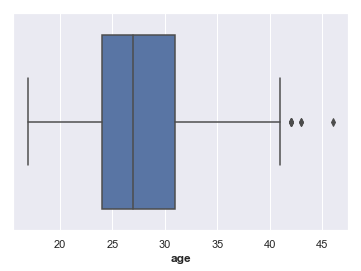

In [191]:
sns.set(style="darkgrid")
boxplot = sns.boxplot(x="age", data=players_age)
boxplot

#### Frequency of players with different ages

In [362]:
table_freq=players_age.groupby('age').size()
#table-freq=table_freq.reset_index(drop=True)
df= pd.DataFrame(table_freq)
serial_no=list(range(14))
df=df.reset_index()
df.columns=['age','frequency']
df.head()

,age,frequency
0,17,3
1,18,19
2,19,64
3,20,150
4,21,188


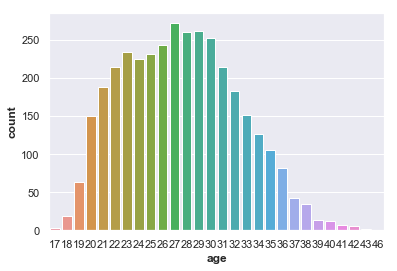

In [193]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age", data=players_age)
plt.show()

In [194]:
player_eff=pd.read_json(r'C:\Users\Debodeep\Documents\Sapienza Learning Materials\ADM\ADMHw2\final_player_ratio.json')
player_eff


,birthDate,PlayerId,shortName,officialName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1989-03-02,36,T. Alderweireld,Tottenham Hotspur FC,0.665924,598,898
1,1987-04-24,48,J. Vertonghen,Tottenham Hotspur FC,0.476371,1129,2370
2,1992-02-14,54,C. Eriksen,Tottenham Hotspur FC,0.395719,869,2196
3,1990-07-02,8292,D. Rose,Tottenham Hotspur FC,0.362245,142,392
4,1993-07-28,8717,H. Kane,Tottenham Hotspur FC,0.414141,246,594
...,...,...,...,...,...,...,...
335,1990-08-12,189821,M. Zeegelaar,Watford FC,0.353211,154,436
336,1989-08-12,7929,T. Cleverley,Watford FC,0.767808,830,1081
337,1991-06-26,10663,A. Gray,Watford FC,0.527675,143,271
338,1993-01-01,28292,A. Doucour\u00e9,Watford FC,0.463728,1010,2178


In [195]:
player_ex_dob=player_eff.drop(columns=['birthDate'])
player_ex_dob

,PlayerId,shortName,officialName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,36,T. Alderweireld,Tottenham Hotspur FC,0.665924,598,898
1,48,J. Vertonghen,Tottenham Hotspur FC,0.476371,1129,2370
2,54,C. Eriksen,Tottenham Hotspur FC,0.395719,869,2196
3,8292,D. Rose,Tottenham Hotspur FC,0.362245,142,392
4,8717,H. Kane,Tottenham Hotspur FC,0.414141,246,594
...,...,...,...,...,...,...
335,189821,M. Zeegelaar,Watford FC,0.353211,154,436
336,7929,T. Cleverley,Watford FC,0.767808,830,1081
337,10663,A. Gray,Watford FC,0.527675,143,271
338,28292,A. Doucour\u00e9,Watford FC,0.463728,1010,2178


In [196]:
player_eff['age'] = pd.to_datetime(player_eff['birthDate'], errors='coerce')
now = pd.to_datetime('now')
now=(now - player_eff['age']).astype('<m8[Y]') 
age=now.astype(int)
age=pd.DataFrame(age)
age

,age
0,30
1,32
2,27
3,29
4,26
...,...
335,29
336,30
337,28
338,26


In [197]:
players_age_eff=pd.concat([player_ex_dob,age],axis=1).drop(columns=['Efficiency'])
players_age_eff

,PlayerId,shortName,officialName,AccuratePassesNumber,TotalPassesNumber,age
0,36,T. Alderweireld,Tottenham Hotspur FC,598,898,30
1,48,J. Vertonghen,Tottenham Hotspur FC,1129,2370,32
2,54,C. Eriksen,Tottenham Hotspur FC,869,2196,27
3,8292,D. Rose,Tottenham Hotspur FC,142,392,29
4,8717,H. Kane,Tottenham Hotspur FC,246,594,26
...,...,...,...,...,...,...
335,189821,M. Zeegelaar,Watford FC,154,436,29
336,7929,T. Cleverley,Watford FC,830,1081,30
337,10663,A. Gray,Watford FC,143,271,28
338,28292,A. Doucour\u00e9,Watford FC,1010,2178,26


## Research Question: Does age group influence acuracy:

#### dividing the player with respect to the age groups

In [198]:
# Age group 20.5-25.5
table1= players_age_eff.query('20.5<=age<=25.5')
table1

,PlayerId,shortName,officialName,AccuratePassesNumber,TotalPassesNumber,age
7,210044,E. Dier,Tottenham Hotspur FC,1073,2147,25
8,13484,D. Alli,Tottenham Hotspur FC,451,1184,23
12,240070,H. Winks,Tottenham Hotspur FC,568,628,23
13,257762,D. S\u00e1nchez,Tottenham Hotspur FC,617,1803,23
18,402884,K. Walker-Peters,Tottenham Hotspur FC,57,104,22
50,346071,O. Burke,West Bromwich Albion FC,41,140,22
51,434159,S. Field,West Bromwich Albion FC,99,160,21
66,247248,S. March,Brighton & Hove Albion FC,336,689,25
67,230020,A. Iwobi,Arsenal FC,377,1140,23
80,167145,Beller\u00edn,Arsenal FC,937,1877,24


In [199]:
# Age group 25.5-30.5
table2=players_age_eff.query('25.5<=age<=30.5')
table2

,PlayerId,shortName,officialName,AccuratePassesNumber,TotalPassesNumber,age
0,36,T. Alderweireld,Tottenham Hotspur FC,598,898,30
2,54,C. Eriksen,Tottenham Hotspur FC,869,2196,27
3,8292,D. Rose,Tottenham Hotspur FC,142,392,29
4,8717,H. Kane,Tottenham Hotspur FC,246,594,26
5,8945,K. Trippier,Tottenham Hotspur FC,601,1311,29
...,...,...,...,...,...,...
334,160,D. Janmaat,Watford FC,161,822,30
335,189821,M. Zeegelaar,Watford FC,154,436,29
336,7929,T. Cleverley,Watford FC,830,1081,30
337,10663,A. Gray,Watford FC,143,271,28


In [200]:
# Age group 30.5-35.5
table3=players_age_eff.query('30.5<=age<=35.5')
table3

,PlayerId,shortName,officialName,AccuratePassesNumber,TotalPassesNumber,age
1,48,J. Vertonghen,Tottenham Hotspur FC,1129,2370,32
6,11152,M. Demb\u00e9l\u00e9,Tottenham Hotspur FC,558,1365,32
10,25381,H. Lloris,Tottenham Hotspur FC,347,815,32
21,8433,S. Ward,Burnley FC,412,999,34
25,8301,J. Hart,Burnley FC,185,322,32
26,8284,A. Lennon,Burnley FC,114,497,32
27,8516,P. Bardsley,Burnley FC,162,417,34
28,70092,S. Defour,Burnley FC,684,1019,31
39,8370,C. Brunt,West Bromwich Albion FC,168,878,34
43,25865,B. Sako,West Bromwich Albion FC,36,127,31


In [201]:
s11=table1['AccuratePassesNumber'].sum()
s12=table1['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 20.5-25.5
s13=s12-s11
#The list contains total number of inaccurate passes and inaccurate passes
L1=list([round(s11/len(table1)),round(s13/len(table1))])
L1

[311.0, 447.0]

In [202]:
s21=table2['AccuratePassesNumber'].sum()
s22=table2['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 25.5-30.5
s23=s22-s21
#The list contains total number of inaccurate passes and inaccurate passes
L2=list([round(s21/len(table2)),round(s23/len(table2))])
L2

[383.0, 518.0]

In [203]:
s31=table3['AccuratePassesNumber'].sum()
s32=table3['TotalPassesNumber'].sum()
# total number of inaccurate passes of the age group 30.5-35.5
s33=s32-s31
#The list contains total number of inaccurate passes and inaccurate passes
L3=list([round(s31/len(table3)),round(s33/len(table3))])
L3

[428.0, 479.0]

In [204]:
table=[L1,L2,L3]
table

[[311.0, 447.0], [383.0, 518.0], [428.0, 479.0]]

In [205]:
# Generating the contingency table
data = [['20.5-25.5', *L1], ['25.5-30.5', *L2], ['30.5-35.5', *L3]] 
df_data = pd.DataFrame(data, columns = ['Age_group', 'Average accurate passes','Average inaccurate passes'])
df_data = df_data.set_index(df_data.Age_group).drop('Age_group', axis = 1)

#### Chi-Squared Test
A chi-squared test with significance level  𝛼=0.05  will now be performed on the above contingency table.

$H_0$ : The null Hypothesis is that there's no statistically significant relationship between age of the players and the efficiency of the players

$H_1$: The alternative hypotesis is that there's significant relationship between age of the players and the efficiency of the players.

In [206]:
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=2
[[331.44037412 426.55962588]
 [393.96804365 507.03195635]
 [396.59158223 510.40841777]]
probability=0.950, critical=5.991, stat=7.203
Dependent (reject H0)
significance=0.050, p=0.027
Dependent (reject H0)


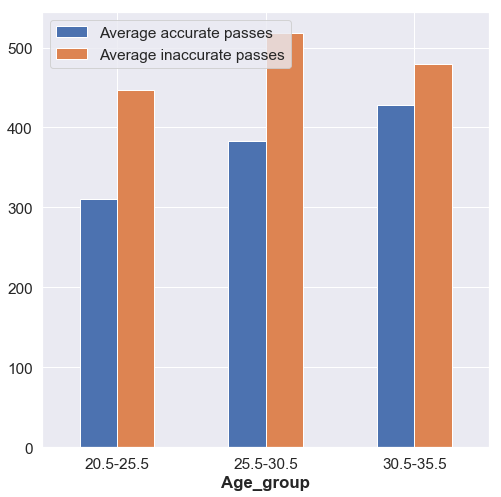

In [207]:
sns.set(font_scale=1.4)
df_data.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=False)
plt.xticks(rotation=0)
plt.show()

#### Consider the level of significance  𝛼  be 0.05. From the chi square test, we observe that the p-value is 0.027. Which is indeed less than the level of significance  𝛼 . As,  𝑝<𝛼 , we reject the null hypothesis and can claim that there is significant statistical relationship between the age of a player and his efficiency. In particular, the barplot shows that accuracy increases with age, suggesting that years of experience influence the accuracy of players.

# Bonus_[RQ1]

# ${\bullet}$Analysis of La Liga

####  Information needed: Teams and matches related to Spain

In [208]:
import json
import pandas as pd
import requests
import numpy
import matplotlib.pyplot as plt

In [270]:
team=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json")
pd.set_option('display.max_rows', 142)
pd.set_option('display.max_columns', 12)
#From index 98, the type is given as Nation. So we don't need that.
team

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,"{'name': 'France', 'id': '250', 'alpha3code': ...",club
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,"{'name': 'Germany', 'id': '276', 'alpha3code':...",club
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [271]:
#convert the area from a series to a list
#Convert the list into a dataframe and concate the dataframe to the parent data i.e. team.
#Drop the column 'area'
team = pd.concat([team,pd.DataFrame(list(team['area']))],axis = 1).drop('area',axis = 1)
team=team[:98]
team

,city,name,wyId,officialName,type,name,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


In [272]:
# changing column name: The column tht contains the country names is converted into "country"
t=list(team.columns)
t[5]='country'
t
team.columns=t
team

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,club,England,0,XEN,
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,club,England,0,XEN,
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES


In [273]:
#As this is La liga, we need information solely based on Spain.
team_esp=team[(team['alpha3code']=='ESP')&(team['type']=='club')]
team_esp

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
4,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
6,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
9,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES
10,Madrid,Atl\u00e9tico Madrid,679,Club Atl\u00e9tico de Madrid,club,Spain,724,ESP,ES
13,Valencia,Valencia,674,Valencia Club de F\u00fatbol,club,Spain,724,ESP,ES
14,Madrid,Real Madrid,675,Real Madrid Club de F\u00fatbol,club,Spain,724,ESP,ES
15,Barcelona,Barcelona,676,FC Barcelona,club,Spain,724,ESP,ES


In [213]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_esp=team_esp.reset_index(drop=True)
team_esp

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,club,Spain,724,ESP,ES
1,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,club,Spain,724,ESP,ES
2,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,club,Spain,724,ESP,ES
3,Valencia,Levante,695,Levante UD,club,Spain,724,ESP,ES
4,Getafe (Madrid),Getafe,698,Getafe Club de F\u00fatbol,club,Spain,724,ESP,ES
5,Bilbao,Athletic Club,678,Athletic Club Bilbao,club,Spain,724,ESP,ES
6,Madrid,Atl\u00e9tico Madrid,679,Club Atl\u00e9tico de Madrid,club,Spain,724,ESP,ES
7,Valencia,Valencia,674,Valencia Club de F\u00fatbol,club,Spain,724,ESP,ES
8,Madrid,Real Madrid,675,Real Madrid Club de F\u00fatbol,club,Spain,724,ESP,ES
9,Barcelona,Barcelona,676,FC Barcelona,club,Spain,724,ESP,ES


In [214]:
matches_esp= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Spain.json')
pd.set_option('display.max_columns', 14)
matches_esp.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406122,38,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",181144,2018-05-20 18:45:00,676,Camp Nou,2565922,"Barcelona - Real Sociedad, 1 - 0","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 398931, 'role': 'referee'}, {'r...",Regular,795
1,Played,4406122,38,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",181144,2018-05-20 16:30:00,0,Estadio Wanda Metropolitano,2565925,"Atl\u00e9tico Madrid - Eibar, 2 - 2","May 20, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",Regular,795
2,Played,4406122,38,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",181144,2018-05-20 14:15:00,691,San Mam\u00e9s Barria,2565919,"Athletic Club - Espanyol, 0 - 1","May 20, 2018 at 4:15:00 PM GMT+2","[{'refereeId': 384957, 'role': 'referee'}, {'r...",Regular,795
3,Played,4406122,38,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2018-05-20 10:00:00,674,Estadio de Mestalla,2565924,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","May 20, 2018 at 12:00:00 PM GMT+2","[{'refereeId': 398913, 'role': 'referee'}, {'r...",Regular,795
4,Played,4406122,38,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-19 18:45:00,0,Estadio de la Cer\u00e1mica,2565927,"Villarreal - Real Madrid, 2 - 2","May 19, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",Regular,795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4406122,1,"{'691': {'scoreET': 0, 'coachId': 169425, 'sid...",181144,2017-08-19 20:15:00,0,Estadio Ram\u00f3n S\u00e1nchez Pizju\u00e1n,2565552,"Sevilla - Espanyol, 1 - 1","August 19, 2017 at 10:15:00 PM GMT+2","[{'refereeId': 378950, 'role': 'referee'}, {'r...",Regular,795
376,Played,4406122,1,"{'756': {'scoreET': 0, 'coachId': 167044, 'sid...",181144,2017-08-19 18:15:00,0,Estadi Municipal de Montilivi,2565551,"Girona - Atl\u00e9tico Madrid, 2 - 2","August 19, 2017 at 8:15:00 PM GMT+2","[{'refereeId': 378994, 'role': 'referee'}, {'r...",Regular,795
377,Played,4406122,1,"{'692': {'scoreET': 0, 'coachId': 3880, 'side'...",181144,2017-08-19 16:15:00,687,Estadio de Bala\u00eddos,2565549,"Celta de Vigo - Real Sociedad, 2 - 3","August 19, 2017 at 6:15:00 PM GMT+2","[{'refereeId': 384946, 'role': 'referee'}, {'r...",Regular,795
378,Played,4406122,1,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2017-08-18 20:15:00,674,Estadio de Mestalla,2565556,"Valencia - Las Palmas, 1 - 0","August 18, 2017 at 10:15:00 PM GMT+2","[{'refereeId': 381927, 'role': 'referee'}, {'r...",Regular,795


In [215]:
results_esp = matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_esp
# results.columns = ['result_home','result_away']
results_esp = pd.concat([matches_esp['gameweek'],results_esp,matches_esp.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_esp.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_esp

,gameweek,goal_home,goal_away,team_home,team_away
0,38,1,0,Barcelona,Real Sociedad
1,38,2,2,Atl\u00e9tico Madrid,Eibar
2,38,0,1,Athletic Club,Espanyol
3,38,2,1,Valencia,Deportivo La Coru\u00f1a
4,38,2,2,Villarreal,Real Madrid
...,...,...,...,...,...
375,1,1,1,Sevilla,Espanyol
376,1,2,2,Girona,Atl\u00e9tico Madrid
377,1,2,3,Celta de Vigo,Real Sociedad
378,1,1,0,Valencia,Las Palmas


In [216]:
results_esp['points_home'] = 0
results_esp['points_away'] = 0
for i in range(results_esp.shape[0]):
    if results_esp.loc[i,'goal_home']>results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_home']=3
    elif results_esp.loc[i,'goal_home']<results_esp.loc[i,'goal_away']:
        results_esp.loc[i,'points_away']=3
    else:
        results_esp.loc[i,'points_home']=1
        results_esp.loc[i,'points_away']=1

In [217]:
home = results_esp[['gameweek','team_home','points_home']]
away = results_esp[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_esp = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_esp
# away

,gameweek,team,points
0,1,Athletic Club,1
1,1,Atl\u00e9tico Madrid,1
2,1,Barcelona,3
3,1,Celta de Vigo,0
4,1,Deportivo Alav\u00e9s,0
...,...,...,...
755,38,Real Madrid,1
756,38,Real Sociedad,0
757,38,Sevilla,3
758,38,Valencia,3


In [218]:
team_list = list(points_table_esp.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_esp.loc[(points_table_esp['gameweek']==week)&(points_table_esp['team']==team),'points'])
table_esp=points_byweek
table_esp=table_esp.sort_values(by=(38),ascending=False)
table_esp=table_esp.T
pd.set_option('display.max_columns', 20)
table_esp

,Barcelona,Atl\u00e9tico Madrid,Real Madrid,Valencia,Villarreal,Real Betis,Sevilla,Getafe,Eibar,Girona,Celta de Vigo,Espanyol,Real Sociedad,Deportivo Alav\u00e9s,Levante,Athletic Club,Legan\u00e9s,Deportivo La Coru\u00f1a,Las Palmas,M\u00e1laga
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,3,3,0,0,1,1,3,1,0,1,3,0,3,1,3,0,0,0
2,6,4,4,4,0,3,4,1,3,4,0,1,6,0,4,4,6,1,0,0
3,9,5,5,5,3,3,7,4,3,4,3,1,9,0,5,7,6,1,3,0
4,12,8,8,6,6,6,10,4,6,4,3,4,9,0,6,7,6,1,6,0
5,15,11,8,9,7,9,13,5,6,5,4,5,9,0,9,7,7,4,6,0
6,18,14,11,12,7,12,13,8,6,5,7,8,9,0,9,8,10,4,6,1
7,21,15,14,15,10,13,16,8,6,6,8,8,10,3,9,8,11,7,6,1
8,22,16,17,18,13,13,16,8,7,6,11,9,13,3,10,11,14,8,6,1
9,25,19,20,21,16,16,16,9,7,9,11,10,14,3,11,11,17,8,6,1


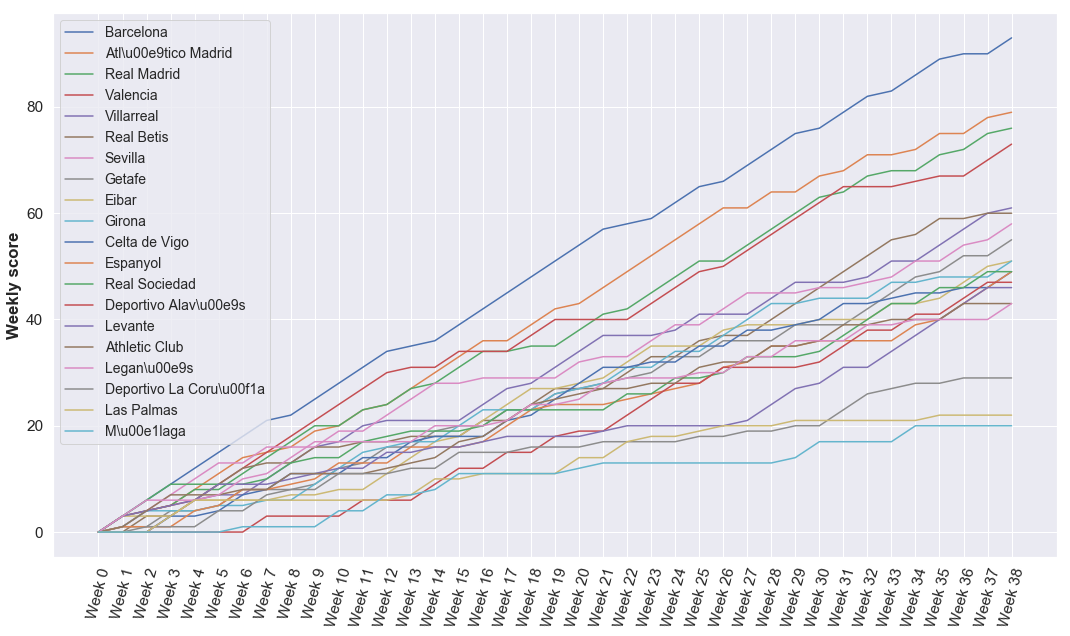

In [249]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_esp)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_esp.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [223]:
rest={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max
    


In [224]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
18,Valencia,8
2,Barcelona,7
14,Real Betis,6
1,Atl\u00e9tico Madrid,6
12,Levante,5
17,Sevilla,4
15,Real Madrid,4
19,Villarreal,3
3,Celta de Vigo,3
4,Deportivo Alav\u00e9s,3


In [225]:
result={}
for i in points_table_esp.team.unique():
    t = list(points_table_esp.where(points_table_esp.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [226]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
10,Las Palmas,8
13,M\u00e1laga,7
4,Deportivo Alav\u00e9s,6
11,Legan\u00e9s,4
16,Real Sociedad,4
12,Levante,4
18,Valencia,3
17,Sevilla,3
0,Athletic Club,3
7,Espanyol,3


#### From the data and the plot we can see that the team which has the longest winning streak is Valncia. Valencia made a winning chain of 8 matches. On the other hand, the team with highest losing streak is Las Palmas.

# ${\bullet}$Analysis for Bundesliga

#### Information needed: Teams and matches related to Germany

In [232]:
#As this is Bundesliga, we need information solely based on Germany.
team_ger=team[(team['alpha3code']=='DEU')&(team['type']=='club')]
team_ger

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
7,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
28,Bremen,Werder Bremen,2443,SV Werder Bremen,club,Germany,276,DEU,DE
29,Leverkusen,Bayer Leverkusen,2446,TSV Bayer 04 Leverkusen,club,Germany,276,DEU,DE
30,Dortmund,Borussia Dortmund,2447,BV Borussia 09 Dortmund,club,Germany,276,DEU,DE
31,M\u00fcnchen,Bayern M\u00fcnchen,2444,FC Bayern M\u00fcnchen,club,Germany,276,DEU,DE
32,Stuttgart,Stuttgart,2445,VfB Stuttgart 1893,club,Germany,276,DEU,DE
33,Gelsenkirchen,Schalke 04,2449,FC Schalke 04,club,Germany,276,DEU,DE
41,Hannover,Hannover 96,2455,Hannover 96,club,Germany,276,DEU,DE
43,Berlin,Hertha BSC,2457,Hertha BSC,club,Germany,276,DEU,DE
44,Wolfsburg,Wolfsburg,2451,VfL Wolfsburg,club,Germany,276,DEU,DE


In [233]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ger=team_ger.reset_index(drop=True)
team_ger

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,M\u00f6nchengladbach,Borussia M'gladbach,2454,Borussia VfL M\u00f6nchengladbach,club,Germany,276,DEU,DE
1,Bremen,Werder Bremen,2443,SV Werder Bremen,club,Germany,276,DEU,DE
2,Leverkusen,Bayer Leverkusen,2446,TSV Bayer 04 Leverkusen,club,Germany,276,DEU,DE
3,Dortmund,Borussia Dortmund,2447,BV Borussia 09 Dortmund,club,Germany,276,DEU,DE
4,M\u00fcnchen,Bayern M\u00fcnchen,2444,FC Bayern M\u00fcnchen,club,Germany,276,DEU,DE
5,Stuttgart,Stuttgart,2445,VfB Stuttgart 1893,club,Germany,276,DEU,DE
6,Gelsenkirchen,Schalke 04,2449,FC Schalke 04,club,Germany,276,DEU,DE
7,Hannover,Hannover 96,2455,Hannover 96,club,Germany,276,DEU,DE
8,Berlin,Hertha BSC,2457,Hertha BSC,club,Germany,276,DEU,DE
9,Wolfsburg,Wolfsburg,2451,VfL Wolfsburg,club,Germany,276,DEU,DE


#### Import the matches data for germany

In [298]:
matches_ger= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Germany.json')
pd.set_option('display.max_columns', 14)
matches_ger.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405517,34,"{'2444': {'scoreET': 0, 'coachId': 14710, 'sid...",181137,2018-05-12 13:30:00,2445,Allianz Arena,2517036,"Bayern M\u00fcnchen - Stuttgart, 1 - 4","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 379444, 'role': 'referee'}, {'r...",Regular,426
1,Played,4405517,34,"{'2482': {'scoreET': 0, 'coachId': 272299, 'si...",181137,2018-05-12 13:30:00,2482,WIRSOL Rhein-Neckar-Arena,2517037,"Hoffenheim - Borussia Dortmund, 3 - 1","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 384936, 'role': 'referee'}, {'r...",Regular,426
2,Played,4405517,34,"{'2457': {'scoreET': 0, 'coachId': 18987, 'sid...",181137,2018-05-12 13:30:00,2975,Olympiastadion Berlin,2517038,"Hertha BSC - RB Leipzig, 2 - 6","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387276, 'role': 'referee'}, {'r...",Regular,426
3,Played,4405517,34,"{'2453': {'scoreET': 0, 'coachId': 14977, 'sid...",181137,2018-05-12 13:30:00,2453,Schwarzwald-Stadion,2517039,"Freiburg - Augsburg, 2 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 378957, 'role': 'referee'}, {'r...",Regular,426
4,Played,4405517,34,"{'2449': {'scoreET': 0, 'coachId': 447924, 'si...",181137,2018-05-12 13:30:00,2449,VELTINS-Arena,2517040,"Schalke 04 - Eintracht Frankfurt, 1 - 0","May 12, 2018 at 3:30:00 PM GMT+2","[{'refereeId': 387273, 'role': 'referee'}, {'r...",Regular,426


In [235]:
results_ger = matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ger
# results.columns = ['result_home','result_away']
results_ger = pd.concat([matches_ger['gameweek'],results_ger,matches_ger.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ger.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ger

,gameweek,goal_home,goal_away,team_home,team_away
0,34,1,4,Bayern M\u00fcnchen,Stuttgart
1,34,3,1,Hoffenheim,Borussia Dortmund
2,34,2,6,Hertha BSC,RB Leipzig
3,34,2,0,Freiburg,Augsburg
4,34,1,0,Schalke 04,Eintracht Frankfurt
...,...,...,...,...,...
301,1,2,0,Hertha BSC,Stuttgart
302,1,1,0,Hamburger SV,Augsburg
303,1,0,1,Mainz 05,Hannover 96
304,1,0,3,Wolfsburg,Borussia Dortmund


In [236]:
results_ger['points_home'] = 0
results_ger['points_away'] = 0
for i in range(results_ger.shape[0]):
    if results_ger.loc[i,'goal_home']>results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_home']=3
    elif results_ger.loc[i,'goal_home']<results_ger.loc[i,'goal_away']:
        results_ger.loc[i,'points_away']=3
    else:
        results_ger.loc[i,'points_home']=1
        results_ger.loc[i,'points_away']=1

In [237]:
home = results_ger[['gameweek','team_home','points_home']]
away = results_ger[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ger = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ger

,gameweek,team,points
0,1,Augsburg,0
1,1,Bayer Leverkusen,0
2,1,Bayern M\u00fcnchen,3
3,1,Borussia Dortmund,3
4,1,Borussia M'gladbach,3
...,...,...,...
607,34,RB Leipzig,3
608,34,Schalke 04,3
609,34,Stuttgart,3
610,34,Werder Bremen,3


In [238]:
team_list = list(points_table_ger.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,35))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,34):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ger.loc[(points_table_ger['gameweek']==week)&(points_table_ger['team']==team),'points'])
table_ger=points_byweek
table_ger=table_ger.sort_values(by=(34),ascending=False)
table_ger=table_ger.T
pd.set_option('display.max_columns', 18)
table_ger

,Augsburg,Bayer Leverkusen,Bayern M\u00fcnchen,Borussia Dortmund,Borussia M'gladbach,Eintracht Frankfurt,Freiburg,Hamburger SV,Hannover 96,Hertha BSC,Hoffenheim,K\u00f6ln,Mainz 05,RB Leipzig,Schalke 04,Stuttgart,Werder Bremen,Wolfsburg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,3,3,3,1,1,3,3,3,3,0,0,0,3,0,0,0
2,1,1,6,6,4,1,1,6,6,3,4,0,0,3,3,3,0,3
3,4,1,6,7,4,4,2,6,7,4,7,0,3,6,6,3,1,4
4,7,4,9,10,5,4,2,6,10,5,8,0,3,7,9,6,1,4
5,10,4,12,13,8,7,3,6,11,8,11,0,3,7,9,6,2,5
6,11,7,13,16,8,7,4,6,12,8,14,1,6,10,9,7,3,6
7,11,8,14,19,11,10,7,7,12,9,14,1,7,13,10,7,4,7
8,12,9,17,19,14,13,7,7,12,9,15,1,10,16,13,10,4,8
9,12,12,20,20,14,14,8,7,15,10,16,2,10,19,16,10,5,9


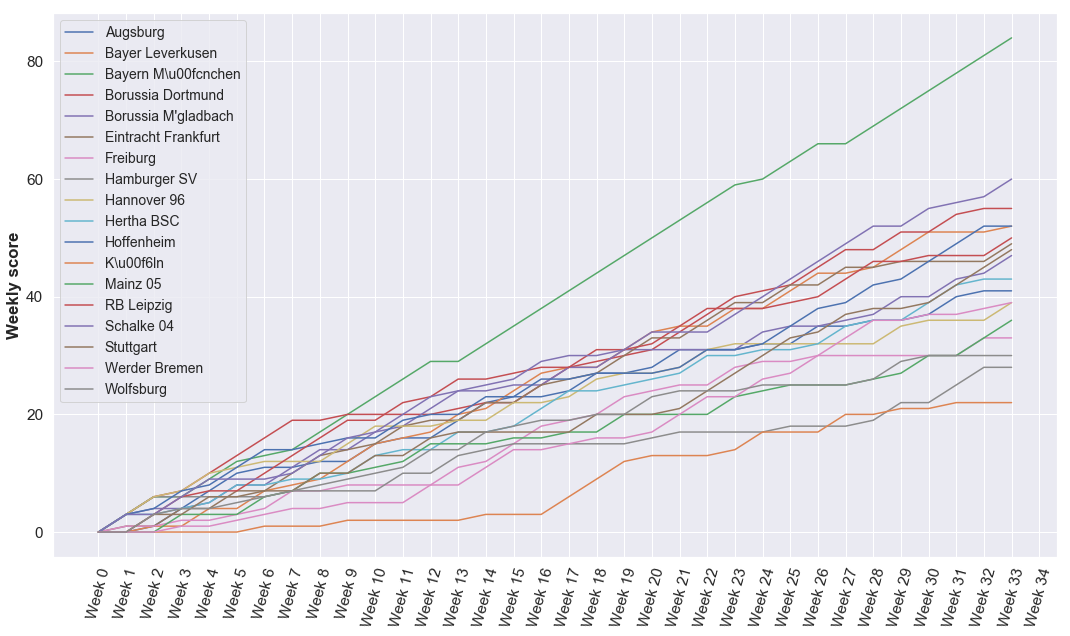

In [242]:
week = (['Week %i' %i for i in range(0, 35)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_ger)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ger.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [243]:
rest={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [244]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
2,Bayern M\u00fcnchen,10
14,Schalke 04,6
3,Borussia Dortmund,4
15,Stuttgart,4
13,RB Leipzig,4
0,Augsburg,3
10,Hoffenheim,3
16,Werder Bremen,3
11,K\u00f6ln,3
12,Mainz 05,2


In [245]:
result={}
for i in points_table_ger.team.unique():
    t = list(points_table_ger.where(points_table_ger.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [246]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
6,Freiburg,5
8,Hannover 96,5
11,K\u00f6ln,5
4,Borussia M'gladbach,4
7,Hamburger SV,4
15,Stuttgart,4
17,Wolfsburg,3
3,Borussia Dortmund,3
5,Eintracht Frankfurt,3
12,Mainz 05,3


#### From the data and the plot we can see that the team which has the longest winning streak is Bayern Munich . Bayern Munich made a winning chain of 10 matches. On the other hand, the team with highest losing streak is Freiburg.

# ${\bullet}$Analysis for Serie A

#### Information needed: Teams and matches related to Italy

In [254]:
#As this is Serie A, we need information solely based on Italy.
team_ita=team[(team['alpha3code']=='ITA')&(team['type']=='club')]
team_ita

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
18,Ferrara,SPAL,3204,Societ\u00e0 Polisportiva Ars et Labor 2013,club,Italy,380,ITA,IT
34,Milano,Milan,3157,AC Milan,club,Italy,380,ITA,IT
36,Torino,Juventus,3159,Juventus FC,club,Italy,380,ITA,IT
37,Roma,Roma,3158,AS Roma,club,Italy,380,ITA,IT
38,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,club,Italy,380,ITA,IT
47,Bologna,Bologna,3166,Bologna FC 1909,club,Italy,380,ITA,IT
49,Genova,Sampdoria,3164,UC Sampdoria,club,Italy,380,ITA,IT
50,Verona,Chievo,3165,AC Chievo Verona,club,Italy,380,ITA,IT
51,Formello,Lazio,3162,SS Lazio,club,Italy,380,ITA,IT
52,Udine,Udinese,3163,Udinese Calcio,club,Italy,380,ITA,IT


In [255]:
# we use reset_index() method to reset the index to 0,1,2,...
# the argument drop is set to true in order to drop the newly generated column 'index' 
# which preserves the original indices of the rows prior to reset 
team_ita=team_ita.reset_index(drop=True)
team_ita

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
0,Ferrara,SPAL,3204,Societ\u00e0 Polisportiva Ars et Labor 2013,club,Italy,380,ITA,IT
1,Milano,Milan,3157,AC Milan,club,Italy,380,ITA,IT
2,Torino,Juventus,3159,Juventus FC,club,Italy,380,ITA,IT
3,Roma,Roma,3158,AS Roma,club,Italy,380,ITA,IT
4,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,club,Italy,380,ITA,IT
5,Bologna,Bologna,3166,Bologna FC 1909,club,Italy,380,ITA,IT
6,Genova,Sampdoria,3164,UC Sampdoria,club,Italy,380,ITA,IT
7,Verona,Chievo,3165,AC Chievo Verona,club,Italy,380,ITA,IT
8,Formello,Lazio,3162,SS Lazio,club,Italy,380,ITA,IT
9,Udine,Udinese,3163,Udinese Calcio,club,Italy,380,ITA,IT


#### Import the matches data for Italy

In [299]:
matches_ita= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_Italy.json')
pd.set_option('display.max_columns', 14)
matches_ita.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Citt\u00e0 del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524


In [257]:
results_ita = matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_ita
# results.columns = ['result_home','result_away']
results_ita = pd.concat([matches_ita['gameweek'],results_ita,matches_ita.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_ita.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_ita

,gameweek,goal_home,goal_away,team_home,team_away
0,38,2,3,Lazio,Internazionale
1,38,0,1,Sassuolo,Roma
2,38,1,0,Cagliari,Atalanta
3,38,1,0,Chievo,Benevento
4,38,1,0,Udinese,Bologna
...,...,...,...,...,...
375,1,0,0,Sassuolo,Genoa
376,1,1,2,Udinese,Chievo
377,1,0,1,Atalanta,Roma
378,1,1,3,Hellas Verona,Napoli


In [258]:
results_ita['points_home'] = 0
results_ita['points_away'] = 0
for i in range(results_ita.shape[0]):
    if results_ita.loc[i,'goal_home']>results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_home']=3
    elif results_ita.loc[i,'goal_home']<results_ita.loc[i,'goal_away']:
        results_ita.loc[i,'points_away']=3
    else:
        results_ita.loc[i,'points_home']=1
        results_ita.loc[i,'points_away']=1

In [259]:
home = results_ita[['gameweek','team_home','points_home']]
away = results_ita[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_ita = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_ita

,gameweek,team,points
0,1,Atalanta,0
1,1,Benevento,0
2,1,Bologna,1
3,1,Cagliari,0
4,1,Chievo,3
...,...,...,...
755,38,SPAL,3
756,38,Sampdoria,0
757,38,Sassuolo,0
758,38,Torino,3


In [260]:
team_list = list(points_table_ita.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_ita.loc[(points_table_ita['gameweek']==week)&(points_table_ita['team']==team),'points'])
table_ita=points_byweek
table_ita=table_ita.sort_values(by=(38),ascending=False)
table_ita=table_ita.T
pd.set_option('display.max_columns', 20)
table_ita

,Juventus,Napoli,Roma,Internazionale,Lazio,Milan,Atalanta,Fiorentina,Sampdoria,Torino,Sassuolo,Genoa,Chievo,Udinese,Cagliari,Bologna,SPAL,Crotone,Hellas Verona,Benevento
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,3,3,3,1,3,0,0,3,1,1,1,3,0,0,1,1,0,0,0
2,6,6,3,6,4,6,0,0,6,4,1,1,3,0,0,4,4,1,1,0
3,9,9,4,9,7,6,3,3,7,7,1,1,3,3,3,4,4,1,1,0
4,12,12,7,12,10,9,4,6,8,8,1,1,4,3,6,4,4,1,1,0
5,15,15,10,13,10,12,7,6,9,11,4,2,5,3,6,5,4,1,2,0
6,18,18,13,16,13,12,8,7,12,11,4,2,8,3,6,8,4,4,2,0
7,19,21,16,19,16,12,9,7,12,12,4,2,11,6,6,11,5,5,3,0
8,19,24,16,22,19,12,9,10,15,13,5,5,12,6,6,14,5,6,6,0
9,22,25,19,23,22,13,12,13,18,13,8,6,15,6,6,14,5,6,6,0


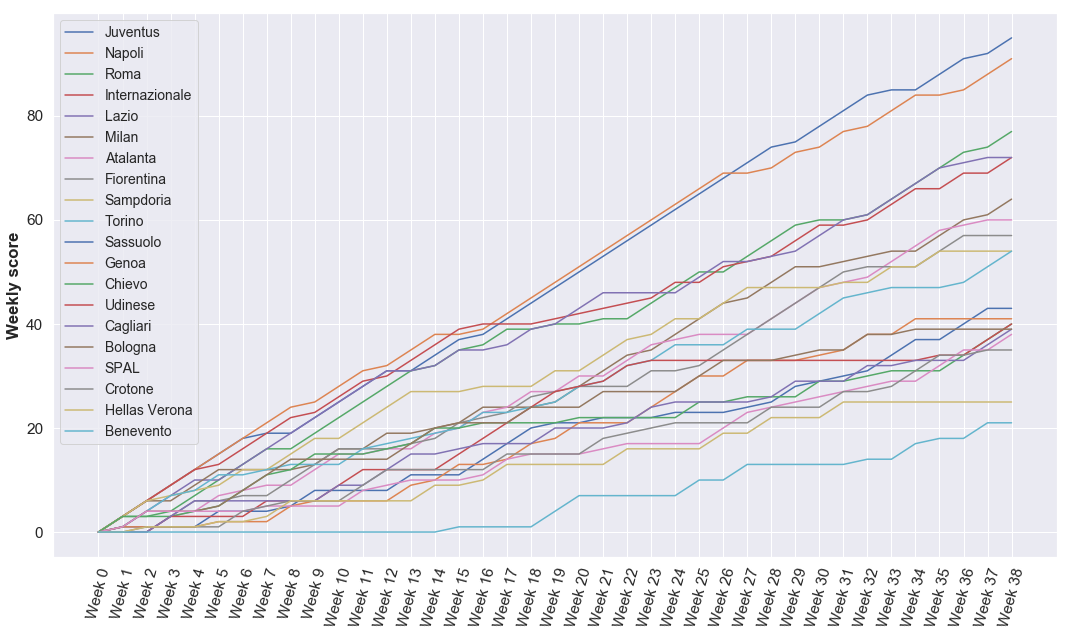

In [264]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_ita)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_ita.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [265]:
rest={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [266]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
10,Juventus,12
13,Napoli,10
11,Lazio,7
6,Fiorentina,6
14,Roma,5
19,Udinese,5
9,Internazionale,4
7,Genoa,3
12,Milan,3
2,Bologna,3


In [267]:
result={}
for i in points_table_ita.team.unique():
    t = list(points_table_ita.where(points_table_ita.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    result[i]=max

In [268]:
out = pd.DataFrame(list(result.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
1,Benevento,14
19,Udinese,11
3,Cagliari,5
8,Hellas Verona,5
15,SPAL,4
2,Bologna,4
4,Chievo,4
5,Crotone,4
7,Genoa,3
17,Sassuolo,3


#### From the data and the plot we can see that the team which has the longest winning streak is Juventas. Juventas made a winning chain of 12 matches. On the other hand, the team with highest losing streak is Benevento.

# ${\bullet}$Analysis for League 1

### Information needed: Teams and matches related to France

In [274]:
#As this is League 1, we need information solely based on France.
team_fra=team[(team['alpha3code']=='FRA')&(team['type']=='club')]
team_fra

,city,name,wyId,officialName,type,country,id,alpha3code,alpha2code
5,Troyes,Troyes,3795,Esp\u00e9rance Sportive Troyes Aube Champagne,club,France,250,FRA,FR
11,Lyon,Olympique Lyonnais,3766,Olympique Lyonnais,club,France,250,FRA,FR
12,Paris,PSG,3767,Paris Saint-Germain FC,club,France,250,FRA,FR
20,Marseille,Olympique Marseille,3771,Olympique de Marseille,club,France,250,FRA,FR
21,La Chapelle-sur-Erdre,Nantes,3770,FC Nantes,club,France,250,FRA,FR
22,Nice,Nice,3775,O.G.C. Nice C\u00f4te d'Azur,club,France,250,FRA,FR
23,Rennes,Rennes,3774,Stade Rennais FC,club,France,250,FRA,FR
24,Strasbourg,Strasbourg,3779,RC Strasbourg Alsace,club,France,250,FRA,FR
35,Angers,Angers,3799,Angers SCO,club,France,250,FRA,FR
40,Le Haillan,Bordeaux,3772,FC Girondins de Bordeaux,club,France,250,FRA,FR


### Import the matches data for France

In [300]:
matches_fra= pd.read_json('C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\matches\\matches_France.json')
pd.set_option('display.max_columns', 14)
matches_fra.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405655,38,"{'3783': {'scoreET': 0, 'coachId': 210513, 'si...",181189,2018-05-19 19:00:00,0,Stade Michel d'Ornano,2501056,"Caen - PSG, 0 - 0","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 384954, 'role': 'referee'}, {'r...",Regular,412
1,Played,4405655,38,"{'3804': {'scoreET': 0, 'coachId': 220743, 'si...",181189,2018-05-19 19:00:00,0,Stade Gaston-G\u00e9rard,2501057,"Dijon - Angers SCO, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385496, 'role': 'referee'}, {'r...",Regular,412
2,Played,4405655,38,"{'3766': {'scoreET': 0, 'coachId': 211238, 'si...",181189,2018-05-19 19:00:00,3766,Groupama Stadium,2501058,"Olympique Lyonnais - Nice, 3 - 2","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 386297, 'role': 'referee'}, {'r...",Regular,412
3,Played,4405655,38,"{'3771': {'scoreET': 0, 'coachId': 25691, 'sid...",181189,2018-05-19 19:00:00,3771,Stade V\u00e9lodrome,2501059,"Olympique Marseille - Amiens SC, 2 - 1","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385529, 'role': 'referee'}, {'r...",Regular,412
4,Played,4405655,38,"{'3772': {'scoreET': 0, 'coachId': 9092, 'side...",181189,2018-05-19 19:00:00,3772,Stade Saint-Symphorien,2501060,"Metz - Bordeaux, 0 - 4","May 19, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385796, 'role': 'referee'}, {'r...",Regular,412


In [276]:
results_fra = matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,1].str.split(' - ', n=1, expand=True)
results_fra
# results.columns = ['result_home','result_away']
results_fra = pd.concat([matches_fra['gameweek'],results_fra,matches_fra.label.str.split(', ', n=1, expand=True).iloc[:,0].str.split(' - ', n=1, expand=True)],1)
results_fra.columns = ['gameweek','goal_home','goal_away','team_home','team_away']
results_fra

,gameweek,goal_home,goal_away,team_home,team_away
0,38,0,0,Caen,PSG
1,38,2,1,Dijon,Angers SCO
2,38,3,2,Olympique Lyonnais,Nice
3,38,2,1,Olympique Marseille,Amiens SC
4,38,0,4,Metz,Bordeaux
...,...,...,...,...,...
375,1,1,0,Montpellier,Caen
376,1,1,0,Saint-\u00c9tienne,Nice
377,1,1,1,Troyes,Rennes
378,1,2,0,PSG,Amiens SC


In [277]:
results_fra['points_home'] = 0
results_fra['points_away'] = 0
for i in range(results_fra.shape[0]):
    if results_fra.loc[i,'goal_home']>results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_home']=3
    elif results_fra.loc[i,'goal_home']<results_fra.loc[i,'goal_away']:
        results_fra.loc[i,'points_away']=3
    else:
        results_fra.loc[i,'points_home']=1
        results_fra.loc[i,'points_away']=1

In [278]:
home = results_fra[['gameweek','team_home','points_home']]
away = results_fra[['gameweek','team_away','points_away']]
home.columns = ['gameweek','team','points']
away.columns = ['gameweek','team','points']
points_table_fra = pd.concat([home,away],0).groupby(['gameweek','team']).sum().reset_index()
points_table_fra

,gameweek,team,points
0,1,Amiens SC,0
1,1,Angers SCO,1
2,1,Bordeaux,1
3,1,Caen,0
4,1,Dijon,0
...,...,...,...
755,38,Rennes,1
756,38,Saint-\u00c9tienne,3
757,38,Strasbourg,0
758,38,Toulouse,3


In [279]:
team_list = list(points_table_fra.team.unique())
TeamLists = {i : [0] for i in team_list}
points_byweek = pd.DataFrame(index=team_list,columns=range(0,39))
points_byweek[0] = 0
for team in team_list:
    for week in range(1,39):
        points_byweek.loc[team,week]=points_byweek.loc[team,week-1]+int(points_table_fra.loc[(points_table_fra['gameweek']==week)&(points_table_fra['team']==team),'points'])
table_fra=points_byweek
table_fra=table_fra.sort_values(by=(38),ascending=False)
table_fra=table_fra.T
pd.set_option('display.max_columns', 18)
table_fra

,PSG,Monaco,Olympique Lyonnais,Olympique Marseille,Rennes,Bordeaux,Saint-\u00c9tienne,Nice,Nantes,...,Guingamp,Amiens SC,Angers SCO,Lille,Caen,Strasbourg,Toulouse,Troyes,Metz
0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0
1,3,3,3,3,1,1,3,0,0,...,3,0,1,3,0,0,0,1,0
2,6,6,6,6,1,4,6,0,0,...,3,0,4,3,0,3,3,4,0
3,9,9,7,7,2,5,9,3,3,...,3,0,5,3,3,4,3,4,0
4,12,12,8,7,2,8,9,3,4,...,6,3,6,4,6,4,6,4,0
5,15,12,11,7,5,9,10,6,7,...,6,6,7,5,9,4,7,5,0
6,18,15,11,10,5,12,13,9,10,...,9,6,7,5,9,4,7,5,3
7,19,18,12,13,6,15,14,10,13,...,9,6,8,5,12,4,7,8,3
8,22,19,13,16,6,15,14,10,16,...,10,9,9,5,15,5,8,11,3
9,25,19,16,17,6,16,17,10,17,...,13,9,12,6,15,6,11,12,3


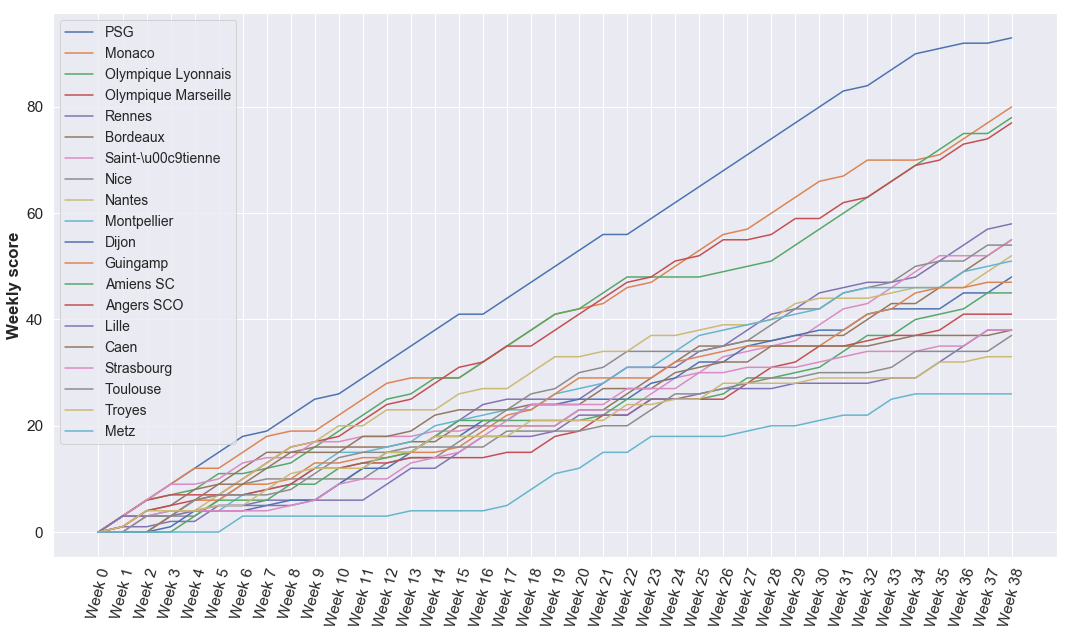

In [286]:
week = (['Week %i' %i for i in range(0, 39)])
week
plt.figure(figsize=(18,10))
fig=plt.plot(week,table_fra)
plt.rcParams['axes.labelweight'] = 'bold'
plt.legend(table_fra.columns,loc='upper left',fontsize='small')
plt.xticks(week,week,rotation=75)
plt.ylabel('Weekly score')
plt.show()

In [287]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 3.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [288]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','winning_streak']
#sort the data in descending order
out.sort_values(by=['winning_streak'], ascending=False)

,teams,winning_streak
14,PSG,9
12,Olympique Lyonnais,8
10,Nantes,4
13,Olympique Marseille,4
2,Bordeaux,4
8,Monaco,4
11,Nice,4
3,Caen,3
17,Strasbourg,3
6,Lille,3


In [289]:
rest={}
for i in points_table_fra.team.unique():
    t = list(points_table_fra.where(points_table_fra.team==i).dropna().points)
    max=0
    counter=0
    for j in t:
        if j == 0.0: counter+=1
        else:
            if counter>max: max=counter
            counter=0
    rest[i]=max

In [290]:
out = pd.DataFrame(list(rest.items()))
out.columns=['teams','losing_streak']
#sort the data in descending order
out.sort_values(by=['losing_streak'], ascending=False)

,teams,losing_streak
7,Metz,6
0,Amiens SC,5
17,Strasbourg,4
11,Nice,4
19,Troyes,4
3,Caen,4
2,Bordeaux,4
5,Guingamp,3
6,Lille,3
9,Montpellier,3


### From the data and the plot we can see that the team which has the longest winning streak is PSG. PSG made a winning chain of 9 matches. On the other hand, the  team with highest losing streak is Metz.

## ${\bullet}$Compilation of the results obtained from all the leagues and observing the differences.
#### Note, this comparative analysis is completely basd on the [RQ1]

 From the datasets, i.e. the leagues and the teams, we analysed five leagues, viz. the premier league, the La Liga, the Bundesliga, the Serie A and League 1. We can observe that all the leagues mentioned above are mutually exclusive in nature, that is, there is no team which can participate in more than one league simultaneously. More, the leagues are organised on country basis. So, the teams can participate according to their geographical terrirory. For example, being situated in the UK, Manchester United participates in the Premier league, not in any other league. Here, we will try to establish a table which will show us the basis similarities and disimilarities between the summary data obtained from the analysis of the leagues.

In [291]:
df= {'League_name': ['Premier league', 'La Liga','Bundesliga','Serie A','League 1'], 'country': ['England & Wales', 'Spain','Germany','Italy', 'France']
    ,'Weeks':[38,38,34,38,38],'Longest winning streak':[19,8,10,12,9],'Longest losing streak':[8,8,5,14,4]}
df=pd.DataFrame(df)
df

,League_name,country,Weeks,Longest winning streak,Longest losing streak
0,Premier league,England & Wales,38,19,8
1,La Liga,Spain,38,8,8
2,Bundesliga,Germany,34,10,5
3,Serie A,Italy,38,12,14
4,League 1,France,38,9,4


#  Bonus_[RQ4]

#### Here we will see the top 10 most efficient players for the La Liga, Bundesliga and the Sirie A along with the premier league.

# La Liga

In [301]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [302]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


### Import the event data for Spain

In [303]:
events_esp=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_Spain.json")
pd.set_option('display.max_columns', 15)
events_esp.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [304]:
events_esp['eventName']=events_esp['eventName'].astype(str)
events_esp=events_esp[(events_esp.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_esp.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422


#### Splitting the column 'Tags' that is a dictionary

In [305]:
TAG1=[]
for i in range(len(events_esp.tags)):
    try:
        TAG1.append(str(events_esp.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_esp.tags)):
    try:
        TAG2.append(str(events_esp.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_esp.tags)):
    try:
        TAG3.append(str(events_esp.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_esp.tags)):
    try:
        TAG4.append(str(events_esp.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_esp=[events_esp,TAG]
events_esp=pd.concat(mix_events_esp,  axis=1,  sort=False).reindex(events_esp.index)
events_esp=events_esp.drop('tags',axis=1)
events_esp.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,3542.0,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548.0,Pass,682.0,1H,2.994582,85,180864419.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,274435.0,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548.0,Pass,682.0,1H,3.137020,85,180864418.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,364860.0,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548.0,Pass,682.0,1H,6.709668,85,180864420.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,3534.0,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548.0,Pass,682.0,1H,8.805497,85,180864421.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,3695.0,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548.0,Pass,682.0,1H,14.047492,85,180864422.0,1801,Notag,Notag,Notag


In [306]:
events_esp['eventName'] = events_esp['eventName'].astype(str)
events_esp=events_esp[(events_esp.eventName.str.contains('Pass'))]
events_esp.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,3542.0,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548.0,Pass,682.0,1H,2.994582,85,180864419.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,274435.0,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548.0,Pass,682.0,1H,3.137020,85,180864418.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,364860.0,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548.0,Pass,682.0,1H,6.709668,85,180864420.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,3534.0,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548.0,Pass,682.0,1H,8.805497,85,180864421.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,3695.0,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548.0,Pass,682.0,1H,14.047492,85,180864422.0,1801,Notag,Notag,Notag


#### Counting the number of passes with respect to the player id

In [307]:
passes=events_esp
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_esp=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_esp['Numberofpasses'] = passes_player_esp.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_esp

,PlayerId,Numberofpasses
0,3542.0,1753
1,274435.0,346
2,364860.0,2338
3,3534.0,1353
4,3695.0,1390
...,...,...
318717,3486.0,37
318718,3695.0,1390
318719,20623.0,490
318720,122832.0,16


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [309]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_esp.Numberofpasses.mean()
std=passes_player_esp.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_esp=[]
frequency_passes_threshold_esp=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_esp.Numberofpasses)):
    frequency_passes.append(float(passes_player_esp.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_esp.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_esp.append(int(frequency_passes[i]))
        ID_passes_threshold_esp.append(int(ID_passes[i]))

In [310]:
passes_threshold_esp=pd.DataFrame(ID_passes_threshold_esp, columns=['PlayerId'])
passes_threshold_esp.insert(1, "Numberofpasses",frequency_passes_threshold_esp, True)
passes_threshold_esp.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_esp

,PlayerId,Numberofpasses
0,3542,1753
1,364860,2338
2,3534,1353
3,3695,1390
4,3277,1333
...,...,...
149219,112366,542
151293,20803,542
151302,424624,604
152935,364850,559


In [312]:
events_esp_tag2=events_esp.loc[events_esp['Tag2'] == '1801']
events_esp_tag1=events_esp.loc[events_esp['Tag1']=='1801']
events_esp_tag3=events_esp.loc[events_esp['Tag3']=='1801']
events_esp_tag4=events_esp.loc[events_esp['Tag4']=='1801']
events_esp_tag=[events_esp_tag1,events_esp_tag2,events_esp_tag3,events_esp_tag4]
success_esp=pd.concat(events_esp_tag, axis=0)
success_esp.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,3542.0,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548.0,Pass,682.0,1H,2.994582,85,180864419.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,274435.0,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548.0,Pass,682.0,1H,3.137020,85,180864418.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,364860.0,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548.0,Pass,682.0,1H,6.709668,85,180864420.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,3534.0,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548.0,Pass,682.0,1H,8.805497,85,180864421.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,3695.0,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548.0,Pass,682.0,1H,14.047492,85,180864422.0,1801,Notag,Notag,Notag


In [313]:
S=[]
for i in range(len(success_esp.playerId)):
   S.append(success_esp.playerId.iloc[i])
success_esp_new=pd.DataFrame(S , columns=['PlayerId'])
success_esp_new['Numberofpasses'] = success_esp_new.groupby('PlayerId')['PlayerId'].transform('count')
success_esp_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_esp_new

,PlayerId,Numberofpasses
0,3542.0,766
1,274435.0,149
2,364860.0,1064
3,3534.0,583
4,3695.0,606
...,...,...
117636,7864.0,49
119552,3779.0,4
121694,247150.0,20
123531,3604.0,2


In [314]:
final_passes_esp=pd.merge(success_esp_new, passes_threshold_esp, on='PlayerId')
final_passes_esp=final_passes_esp.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_esp.head()

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,3542.0,766,1753
1,364860.0,1064,2338
2,3534.0,583,1353
3,3695.0,606,1390
4,3277.0,689,1333


In [315]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
espteams = teams[(teams["alpha3code"]=="ESP") & (teams["type"]=="club")]
espplayer = players.merge(espteams, left_on="currentTeamId", right_on="wyId")
espplayer=espplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

espplayer=espplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
espplayer=espplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_esp=pd.merge(espplayer, final_passes_esp, on='PlayerId')
final_player_passes_esp.head()

,birthDate,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber
0,1988-11-20,254,R. Rosales,592,1475
1,1991-01-11,3568,Recio,682,887
2,1984-09-14,3645,Chory Castro,345,873
3,1988-05-25,3705,Adri\u00e1n,479,980
4,1986-02-10,3719,Roberto,241,508


In [316]:
Efficiency_esp=[]
for i in range(len(final_player_passes_esp.AccuratePassesNumber)):
    total=final_player_passes_esp.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_esp.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_esp.append(Ratio)
Efficiency_esp=pd.DataFrame(Efficiency_esp)

In [317]:
final_player_passes_esp.insert(4,'Efficiency',Efficiency_esp)
final_player_ratio_esp=final_player_passes_esp

final_player_ratio_esp.head()

,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1988-11-20,254,R. Rosales,592,0.401356,1475
1,1991-01-11,3568,Recio,682,0.768884,887
2,1984-09-14,3645,Chory Castro,345,0.395189,873
3,1988-05-25,3705,Adri\u00e1n,479,0.488776,980
4,1986-02-10,3719,Roberto,241,0.474409,508


In [318]:
#The top 10 players
bestefficiency_esp=final_player_ratio_esp.nlargest(10, ['Efficiency']) 
bestefficiency_esp=bestefficiency_esp.reset_index()
bestefficiency_esp=bestefficiency_esp.drop(columns=['index','PlayerId'])
bestefficiency_esp=bestefficiency_esp.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_esp

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1990-09-15,Bigas,504,0.904847,557
1,1989-11-14,Font\u00e0s,587,0.845821,694
2,1991-01-11,Recio,682,0.768884,887
3,1989-12-23,Z. Feddal,548,0.718218,763
4,1989-11-26,Juan Cala,390,0.707804,551
5,1993-01-20,Fede Cartabia,370,0.696798,531
6,1985-10-14,G. Cabral,825,0.676784,1219
7,1989-03-26,S. Kj\u00e6r,509,0.673280,756
8,1998-07-22,F. Valverde,363,0.656420,553
9,1992-03-27,V.Lindelof,382,0.648557,589


## Bundsliga

In [319]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [320]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


### Import the event data for Germany

In [327]:
events_ger=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_Germany.json")
pd.set_option('display.max_columns', 15)
events_ger.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes.

In [328]:
events_ger['eventName']=events_ger['eventName'].astype(str)
events_ger=events_ger[(events_ger.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_ger.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739,Pass,2446,1H,2.409746,85,179896442
1,8,Simple pass,[{'id': 1801}],14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739,Pass,2446,1H,2.506082,85,179896443
2,8,Simple pass,[{'id': 1801}],14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739,Pass,2446,1H,6.946706,85,179896444
3,8,Simple pass,[{'id': 1801}],14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739,Pass,2446,1H,10.786491,85,179896445
4,8,Simple pass,[{'id': 1801}],14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739,Pass,2446,1H,12.684514,85,179896446


#### Splitting the column 'Tags' that is a dictionary

In [329]:
TAG1=[]
for i in range(len(events_ger.tags)):
    try:
        TAG1.append(str(events_ger.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_ger.tags)):
    try:
        TAG2.append(str(events_ger.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_ger.tags)):
    try:
        TAG3.append(str(events_ger.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_ger.tags)):
    try:
        TAG4.append(str(events_ger.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_ger=[events_ger,TAG]
events_ger=pd.concat(mix_events_ger,  axis=1,  sort=False).reindex(events_ger.index)
events_ger=events_ger.drop('tags',axis=1)


In [330]:
events_ger['eventName'] = events_ger['eventName'].astype(str)
events_ger=events_ger[(events_ger.eventName.str.contains('Pass'))]
events_ger.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,15231.0,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739.0,Pass,2446.0,1H,2.409746,85,179896442.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,14786.0,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739.0,Pass,2446.0,1H,2.506082,85,179896443.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,14803.0,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739.0,Pass,2446.0,1H,6.946706,85,179896444.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,14768.0,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739.0,Pass,2446.0,1H,10.786491,85,179896445.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,14803.0,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739.0,Pass,2446.0,1H,12.684514,85,179896446.0,1801,Notag,Notag,Notag


####  Counting the number of passes with respect to the player id

In [331]:
passes=events_ger
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_ger=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_ger['Numberofpasses'] = passes_player_ger.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_ger

,PlayerId,Numberofpasses
0,15231.0,716
1,14786.0,509
2,14803.0,1473
3,14768.0,883
4,14803.0,1473
...,...,...
261457,16843.0,1444
261458,275384.0,920
261459,15194.0,522
261460,14917.0,1336


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [332]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_ger.Numberofpasses.mean()
std=passes_player_ger.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_ger=[]
frequency_passes_threshold_ger=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_ger.Numberofpasses)):
    frequency_passes.append(float(passes_player_ger.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_ger.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_ger.append(int(frequency_passes[i]))
        ID_passes_threshold_ger.append(int(ID_passes[i]))

In [333]:
passes_threshold_ger=pd.DataFrame(ID_passes_threshold_ger, columns=['PlayerId'])
passes_threshold_ger.insert(1, "Numberofpasses",frequency_passes_threshold_ger, True)
passes_threshold_ger.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_ger

,PlayerId,Numberofpasses
0,15231,716
1,14786,509
2,14803,1473
3,14768,883
5,40657,1163
...,...,...
78219,221172,592
103200,14887,584
110615,19720,742
128400,297957,580


In [334]:
events_ger_tag2=events_ger.loc[events_ger['Tag2'] == '1801']
events_ger_tag1=events_ger.loc[events_ger['Tag1']=='1801']
events_ger_tag3=events_ger.loc[events_ger['Tag3']=='1801']
events_ger_tag4=events_ger.loc[events_ger['Tag4']=='1801']
events_ger_tag=[events_ger_tag1,events_ger_tag2,events_ger_tag3,events_ger_tag4]
success_ger=pd.concat(events_ger_tag, axis=0)
success_ger.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,15231.0,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",2516739.0,Pass,2446.0,1H,2.409746,85,179896442.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,14786.0,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",2516739.0,Pass,2446.0,1H,2.506082,85,179896443.0,1801,Notag,Notag,Notag
2,8.0,Simple pass,14803.0,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",2516739.0,Pass,2446.0,1H,6.946706,85,179896444.0,1801,Notag,Notag,Notag
3,8.0,Simple pass,14768.0,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",2516739.0,Pass,2446.0,1H,10.786491,85,179896445.0,1801,Notag,Notag,Notag
4,8.0,Simple pass,14803.0,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",2516739.0,Pass,2446.0,1H,12.684514,85,179896446.0,1801,Notag,Notag,Notag


In [335]:
S=[]
for i in range(len(success_ger.playerId)):
   S.append(success_ger.playerId.iloc[i])
success_ger_new=pd.DataFrame(S , columns=['PlayerId'])
success_ger_new['Numberofpasses'] = success_ger_new.groupby('PlayerId')['PlayerId'].transform('count')
success_ger_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_ger_new

,PlayerId,Numberofpasses
0,15231.0,263
1,14786.0,237
2,14803.0,629
3,14768.0,393
5,40657.0,459
...,...,...
94854,14887.0,77
96732,372316.0,1
98961,399599.0,9
99320,217052.0,8


In [336]:
final_passes_ger=pd.merge(success_ger_new, passes_threshold_ger, on='PlayerId')
final_passes_ger=final_passes_ger.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_ger

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,15231.0,263,716
1,14786.0,237,509
2,14803.0,629,1473
3,14768.0,393,883
4,40657.0,459,1163
...,...,...,...
221,134392.0,311,956
222,14988.0,155,666
223,14789.0,79,506
224,221172.0,71,592


In [337]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
gerteams = teams[(teams["alpha3code"]=="DEU") & (teams["type"]=="club")]
gerplayer = players.merge(gerteams, left_on="currentTeamId", right_on="wyId")
gerplayer=gerplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

gerplayer=gerplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
gerplayer=gerplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_ger=pd.merge(gerplayer, final_passes_ger, on='PlayerId')
final_player_passes_ger

,birthDate,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber
0,1999-05-25,393247,I. Konat\u00e9,284,606
1,1994-03-17,65596,M. Sabitzer,382,829
2,1995-05-14,296341,Bernardo,235,682
3,1994-10-24,70975,Bruma,319,785
4,1997-05-27,282804,K. Laimer,207,604
...,...,...,...,...,...
215,1991-03-14,14749,G. Sakai,391,1130
216,1992-02-23,14857,K. Papadopoulos,473,1058
217,1990-09-18,14864,L. Holtby,98,524
218,1992-11-01,127796,F. Kosti\u0107,175,704


In [338]:
Efficiency_ger=[]
for i in range(len(final_player_passes_ger.AccuratePassesNumber)):
    total=final_player_passes_ger.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_ger.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_ger.append(Ratio)
Efficiency_ger=pd.DataFrame(Efficiency_ger)

In [339]:
final_player_passes_ger.insert(4,'Efficiency',Efficiency_ger)
final_player_ratio_ger=final_player_passes_ger
final_player_ratio_ger

,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1999-05-25,393247,I. Konat\u00e9,284,0.468647,606
1,1994-03-17,65596,M. Sabitzer,382,0.460796,829
2,1995-05-14,296341,Bernardo,235,0.344575,682
3,1994-10-24,70975,Bruma,319,0.406369,785
4,1997-05-27,282804,K. Laimer,207,0.342715,604
...,...,...,...,...,...,...
215,1991-03-14,14749,G. Sakai,391,0.346018,1130
216,1992-02-23,14857,K. Papadopoulos,473,0.447070,1058
217,1990-09-18,14864,L. Holtby,98,0.187023,524
218,1992-11-01,127796,F. Kosti\u0107,175,0.248580,704


In [340]:
bestefficiency_ger=final_player_ratio_ger.nlargest(10, ['Efficiency']) 
bestefficiency_ger=bestefficiency_ger.reset_index()
bestefficiency_ger=bestefficiency_ger.drop(columns=['index','PlayerId'])
bestefficiency_ger=bestefficiency_ger.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_ger

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1991-09-27,M. Halstenberg,456,0.807080,565
1,1983-05-28,M. Lehmann,613,0.780892,785
2,1996-06-13,K. Coman,418,0.716981,583
3,1993-07-03,K. Demirbay,435,0.698234,623
4,1994-03-13,Y. Gerhardt,376,0.693727,542
5,1997-09-09,F. Uduokhai,581,0.676368,859
6,1988-01-15,S. Langkamp,468,0.642857,728
7,1988-09-05,N. \u015eahin,643,0.634748,1013
8,1995-09-18,M. Meyer,637,0.626969,1016
9,1987-05-22,V.Lindelof,687,0.619477,1109


### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 89.03% in the Bundesliga.

## Serie-A

In [341]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

### Import the players dataset

In [343]:
players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


###  Import the event data for Italy

In [347]:
events_ita=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_italy.json")
pd.set_option('display.max_columns', 15)
events_ita.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961


#### As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [348]:
events_ita['eventName']=events_ita['eventName'].astype(str)
events_ita=events_ita[(events_ita.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_ita.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
5,8,Simple pass,[{'id': 1801}],8306,"[{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]",2575959,Pass,3158,1H,10.376066,85,180423962
10,8,Simple pass,[{'id': 1801}],86366,"[{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]",2575959,Pass,3172,1H,16.240563,85,180423979
14,8,Simple pass,[{'id': 1801}],8306,"[{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]",2575959,Pass,3158,1H,19.153235,85,180423968


####  Splitting the column 'Tags' that is a dictionary

In [349]:
TAG1=[]
for i in range(len(events_ita.tags)):
    try:
        TAG1.append(str(events_ita.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_ita.tags)):
    try:
        TAG2.append(str(events_ita.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_ita.tags)):
    try:
        TAG3.append(str(events_ita.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_ita.tags)):
    try:
        TAG4.append(str(events_ita.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_ita=[events_ita,TAG]
events_ita=pd.concat(mix_events_ita,  axis=1,  sort=False).reindex(events_ita.index)
events_ita=events_ita.drop('tags',axis=1)

In [350]:
events_ita['eventName'] = events_ita['eventName'].astype(str)
events_ita=events_ita[(events_ita.eventName.str.contains('Pass'))]
events_ita.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,8327.0,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959.0,Pass,3158.0,1H,2.530536,85,180423957.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,20438.0,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959.0,Pass,3158.0,1H,3.768418,85,180423958.0,1801,Notag,Notag,Notag
5,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]",2575959.0,Pass,3158.0,1H,10.376066,85,180423962.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,86366.0,"[{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]",2575959.0,Pass,3172.0,1H,16.240563,85,180423979.0,1801,Notag,Notag,Notag
14,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]",2575959.0,Pass,3158.0,1H,19.153235,85,180423968.0,1801,Notag,Notag,Notag


#### Counting the number of passes with respect to the player id

In [351]:
passes=events_ita
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_ita=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_ita['Numberofpasses'] = passes_player_ita.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_ita

,PlayerId,Numberofpasses
0,8327.0,704
1,20438.0,1219
2,8306.0,2043
3,86366.0,1051
4,8306.0,2043
...,...,...
337312,70974.0,247
337313,349102.0,323
337314,413041.0,169
337315,206318.0,899


####  In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [352]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_ita.Numberofpasses.mean()
std=passes_player_ita.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_ita=[]
frequency_passes_threshold_ita=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_ita.Numberofpasses)):
    frequency_passes.append(float(passes_player_ita.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_ita.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_ita.append(int(frequency_passes[i]))
        ID_passes_threshold_ita.append(int(ID_passes[i]))

In [353]:
passes_threshold_ita=pd.DataFrame(ID_passes_threshold_ita, columns=['PlayerId'])
passes_threshold_ita.insert(1, "Numberofpasses",frequency_passes_threshold_ita, True)
passes_threshold_ita.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_ita

,PlayerId,Numberofpasses
0,8327,704
1,20438,1219
2,8306,2043
3,86366,1051
5,20518,1128
...,...,...
157133,8291,687
160230,3344,724
165435,51145,573
172091,7858,674


In [354]:
events_ita_tag2=events_ita.loc[events_ita['Tag2'] == '1801']
events_ita_tag1=events_ita.loc[events_ita['Tag1']=='1801']
events_ita_tag3=events_ita.loc[events_ita['Tag3']=='1801']
events_ita_tag4=events_ita.loc[events_ita['Tag4']=='1801']
events_ita_tag=[events_ita_tag1,events_ita_tag2,events_ita_tag3,events_ita_tag4]
success_ita=pd.concat(events_ita_tag, axis=0)
success_ita.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,8327.0,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959.0,Pass,3158.0,1H,2.530536,85,180423957.0,1801,Notag,Notag,Notag
1,8.0,Simple pass,20438.0,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959.0,Pass,3158.0,1H,3.768418,85,180423958.0,1801,Notag,Notag,Notag
5,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]",2575959.0,Pass,3158.0,1H,10.376066,85,180423962.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,86366.0,"[{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]",2575959.0,Pass,3172.0,1H,16.240563,85,180423979.0,1801,Notag,Notag,Notag
14,8.0,Simple pass,8306.0,"[{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]",2575959.0,Pass,3158.0,1H,19.153235,85,180423968.0,1801,Notag,Notag,Notag


In [355]:
S=[]
for i in range(len(success_ita.playerId)):
   S.append(success_ita.playerId.iloc[i])
success_ita_new=pd.DataFrame(S , columns=['PlayerId'])
success_ita_new['Numberofpasses'] = success_ita_new.groupby('PlayerId')['PlayerId'].transform('count')
success_ita_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_ita_new

,PlayerId,Numberofpasses
0,8327.0,288
1,20438.0,626
2,8306.0,1004
3,86366.0,523
5,20518.0,548
...,...,...
118470,424241.0,56
124649,352722.0,8
131244,3548.0,3
133979,286225.0,3


In [356]:
final_passes_ita=pd.merge(success_ita_new, passes_threshold_ita, on='PlayerId')
final_passes_ita=final_passes_ita.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_ita

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,8327.0,288,704
1,20438.0,626,1219
2,8306.0,1004,2043
3,86366.0,523,1051
4,20518.0,548,1128
...,...,...,...
243,50069.0,211,786
244,20429.0,312,1027
245,20395.0,227,702
246,40806.0,97,609


In [357]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
itateams = teams[(teams["alpha3code"]=="ITA") & (teams["type"]=="club")]
itaplayer = players.merge(itateams, left_on="currentTeamId", right_on="wyId")
itaplayer=itaplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

itaplayer=itaplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
itaplayer=itaplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_ita=pd.merge(itaplayer, final_passes_ita, on='PlayerId')
final_player_passes_ita


,birthDate,PlayerId,shortName,AccuratePassesNumber,TotalPassesNumber
0,1993-12-19,131184,Ali Adnan,262,639
1,1990-05-04,394,B. Nuytinck,569,1177
2,1994-12-03,265172,A. Bar\u00e1k,501,1112
3,1995-05-07,134508,S. Fofana,456,892
4,1997-08-11,300669,A. Bali\u0107,122,519
...,...,...,...,...,...
232,1992-11-10,21468,M. Perin,313,711
233,1993-01-14,22381,Daniel Bessa,549,837
234,1992-03-02,22883,A. Izzo,461,781
235,1985-05-09,20776,L. Rossettini,513,966


In [358]:
Efficiency_ita=[]
for i in range(len(final_player_passes_ita.AccuratePassesNumber)):
    total=final_player_passes_ita.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_ita.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_ita.append(Ratio)
Efficiency_ita=pd.DataFrame(Efficiency_ita)

In [359]:
final_player_passes_ita.insert(4,'Efficiency',Efficiency_ita)
final_player_ratio_ita=final_player_passes_ita
final_player_ratio_ita

,birthDate,PlayerId,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1993-12-19,131184,Ali Adnan,262,0.410016,639
1,1990-05-04,394,B. Nuytinck,569,0.483432,1177
2,1994-12-03,265172,A. Bar\u00e1k,501,0.450540,1112
3,1995-05-07,134508,S. Fofana,456,0.511211,892
4,1997-08-11,300669,A. Bali\u0107,122,0.235067,519
...,...,...,...,...,...,...
232,1992-11-10,21468,M. Perin,313,0.440225,711
233,1993-01-14,22381,Daniel Bessa,549,0.655914,837
234,1992-03-02,22883,A. Izzo,461,0.590269,781
235,1985-05-09,20776,L. Rossettini,513,0.531056,966


In [360]:
bestefficiency_ita=final_player_ratio_ita.nlargest(10, ['Efficiency']) 
bestefficiency_ita=bestefficiency_ita.reset_index()
bestefficiency_ita=bestefficiency_ita.drop(columns=['index','PlayerId'])
bestefficiency_ita=bestefficiency_ita.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_ita

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,AccuratePassesNumber,Efficiency,TotalPassesNumber
0,1991-02-01,F. Ghoulam,723,0.890394,812
1,1993-01-12,G. Di Chiara,442,0.827715,534
2,1990-08-26,M. Musacchio,689,0.752183,916
3,1985-01-18,R. Montolivo,470,0.697329,674
4,1991-05-01,B. Salamon,592,0.697291,849
5,1989-05-24,A. Taarabt,498,0.693593,718
6,1988-07-03,T. Heurtaux,360,0.688337,523
7,1986-12-07,L. Memushaj,417,0.683607,610
8,1993-01-14,Daniel Bessa,549,0.655914,837
9,1987-07-17,V.Lindelof,465,0.655853,709


### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 89.03% in the Serie-A.

## League 1

In [375]:
import json
import numpy as np
import pandas as pd
import requests
import numpy
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

####  Import the players dataset

In [376]:

players=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\players.json")
players
#Displaying maximum number
pd.set_option('display.max_columns', 14)
players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


#### Import the event data for France

In [377]:
events_fra=pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\events\\events_France.json")
pd.set_option('display.max_columns', 15)
events_fra.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686,Pass,3799,1H,1.935181,85,176505119
1,8,High pass,[{'id': 1801}],29474,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686,Pass,3799,1H,3.599295,83,176505121
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",253784,"[{'y': 74, 'x': 68}, {'y': 54, 'x': 72}]",2500686,Duel,3799,1H,6.827043,10,176505122
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",56441,"[{'y': 26, 'x': 32}, {'y': 46, 'x': 28}]",2500686,Duel,3772,1H,6.985577,10,176505017
4,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",366760,"[{'y': 54, 'x': 72}, {'y': 55, 'x': 73}]",2500686,Duel,3799,1H,9.511272,11,176505124


####  As we have to calculate the efficiency of the players based on the passes, we filter out the information related to passes. Thus we target the column 'eventName' and choose only those rows which contains information related to passes. 

In [378]:
events_fra['eventName']=events_fra['eventName'].astype(str)
events_fra=events_fra[(events_fra.eventName.str.contains('Pass'))]
pd.set_option('display.max_columns', 15)
events_fra.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686,Pass,3799,1H,1.935181,85,176505119
1,8,High pass,[{'id': 1801}],29474,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686,Pass,3799,1H,3.599295,83,176505121
10,8,Simple pass,[{'id': 1801}],56441,"[{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]",2500686,Pass,3772,1H,13.710413,85,176505021
12,8,Hand pass,[{'id': 1801}],26245,"[{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]",2500686,Pass,3799,1H,19.984771,81,176505135
13,8,Simple pass,[{'id': 1801}],26086,"[{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]",2500686,Pass,3799,1H,26.513924,85,176505137


#### Splitting the column 'Tags' that is a dictionary

In [379]:
TAG1=[]
for i in range(len(events_fra.tags)):
    try:
        TAG1.append(str(events_fra.tags[i][0]['id']))
    except:
        TAG1.append('Notag')
TAG2=[]
for i in range(len(events_fra.tags)):
    try:
        TAG2.append(str(events_fra.tags[i][1]['id']))
    except:
        TAG2.append('Notag')
TAG3=[]
for i in range(len(events_fra.tags)):
    try:
        TAG3.append(str(events_fra.tags[i][2]['id']))
    except:
        TAG3.append('Notag')
TAG4=[]
for i in range(len(events_fra.tags)):
    try:
        TAG4.append(str(events_fra.tags[i][2]['id']))
    except:
        TAG4.append('Notag')
TAG1=pd.DataFrame({'Tag1':TAG1})
TAG2=pd.DataFrame({'Tag2':TAG2})
TAG3=pd.DataFrame({'Tag3':TAG3})
TAG4=pd.DataFrame({'Tag4':TAG4})
TAG=[TAG1,TAG2,TAG3,TAG4]
TAG=pd.concat(TAG ,axis=1, sort=False)
mix_events_fra=[events_fra,TAG]
events_fra=pd.concat(mix_events_fra,  axis=1,  sort=False).reindex(events_fra.index)
events_fra=events_fra.drop('tags',axis=1)

In [380]:
events_fra['eventName'] = events_fra['eventName'].astype(str)
events_fra=events_fra[(events_fra.eventName.str.contains('Pass'))]
events_fra.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,253784.0,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686.0,Pass,3799.0,1H,1.935181,85,176505119.0,1801,Notag,Notag,Notag
1,8.0,High pass,29474.0,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686.0,Pass,3799.0,1H,3.599295,83,176505121.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,56441.0,"[{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]",2500686.0,Pass,3772.0,1H,13.710413,85,176505021.0,1801,Notag,Notag,Notag
12,8.0,Hand pass,26245.0,"[{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]",2500686.0,Pass,3799.0,1H,19.984771,81,176505135.0,1801,Notag,Notag,Notag
13,8.0,Simple pass,26086.0,"[{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]",2500686.0,Pass,3799.0,1H,26.513924,85,176505137.0,1801,Notag,Notag,Notag


#### Counting the number of passes with respect to the player id

In [381]:
passes=events_fra
passes=passes.drop('positions',axis=1)
passes.playerId=list(passes.playerId)
PLAYERS=[]
for i in range(len(passes.playerId)):
    PLAYERS.append(passes.playerId.iloc[i])
passes_player_fra=pd.DataFrame(PLAYERS , columns=['PlayerId'])
passes_player_fra['Numberofpasses'] = passes_player_fra.groupby('PlayerId')['PlayerId'].transform('count')
passes_player_fra

,PlayerId,Numberofpasses
0,253784.0,64
1,29474.0,1130
2,56441.0,1497
3,26245.0,169
4,26086.0,1070
...,...,...
319193,263802.0,784
319194,3450.0,504
319195,295761.0,895
319196,249926.0,266


#### In order to set the threshold of the number of passes, we calculate the first quartile of the number of passes. Then we set the lower limit as mean-1.5$\times$sd. The reason behind this is, while dealing with a set of variables, we could give mean-2$\times$ sd. But the value of twice of sd exceeds the mean. So, we go for mean-1.5$\times$sd. Here we are concerned about the players who have played very limited number of matches or insufficient amount of hours. That is why we set the lower limit as the only threshold.

In [382]:
#calculating Mean
#Calculating Standard deviation
Mean=passes_player_fra.Numberofpasses.mean()
std=passes_player_fra.Numberofpasses.std()
Mean=int(Mean)
std=int(std)
#Calculating Lower bound
lower_bound=Mean-std
ID_passes_threshold_fra=[]
frequency_passes_threshold_fra=[]
frequency_passes=[]
ID_passes=[]
for i in range(len(passes_player_fra.Numberofpasses)):
    frequency_passes.append(float(passes_player_fra.Numberofpasses.iloc[i]))
    ID_passes.append(float(passes_player_fra.PlayerId.iloc[i]))
for i in range(len(frequency_passes)):
    if frequency_passes[i]>lower_bound:
        frequency_passes_threshold_fra.append(int(frequency_passes[i]))
        ID_passes_threshold_fra.append(int(ID_passes[i]))

In [383]:
passes_threshold_fra=pd.DataFrame(ID_passes_threshold_fra, columns=['PlayerId'])
passes_threshold_fra.insert(1, "Numberofpasses",frequency_passes_threshold_fra, True)
passes_threshold_fra.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
passes_threshold_fra

,PlayerId,Numberofpasses
0,29474,1130
1,56441,1497
2,26086,1070
5,26265,1269
6,274344,1138
...,...,...
136053,410062,827
140676,25649,1251
147125,41127,611
156078,14801,812


In [384]:
events_fra_tag2=events_fra.loc[events_fra['Tag2'] == '1801']
events_fra_tag1=events_fra.loc[events_fra['Tag1']=='1801']
events_fra_tag3=events_fra.loc[events_fra['Tag3']=='1801']
events_fra_tag4=events_fra.loc[events_fra['Tag4']=='1801']
events_fra_tag=[events_fra_tag1,events_fra_tag2,events_fra_tag3,events_fra_tag4]
success_fra=pd.concat(events_fra_tag, axis=0)
success_fra.head()

,eventId,subEventName,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,Tag1,Tag2,Tag3,Tag4
0,8.0,Simple pass,253784.0,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686.0,Pass,3799.0,1H,1.935181,85,176505119.0,1801,Notag,Notag,Notag
1,8.0,High pass,29474.0,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686.0,Pass,3799.0,1H,3.599295,83,176505121.0,1801,Notag,Notag,Notag
10,8.0,Simple pass,56441.0,"[{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]",2500686.0,Pass,3772.0,1H,13.710413,85,176505021.0,1801,Notag,Notag,Notag
12,8.0,Hand pass,26245.0,"[{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]",2500686.0,Pass,3799.0,1H,19.984771,81,176505135.0,1801,Notag,Notag,Notag
13,8.0,Simple pass,26086.0,"[{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]",2500686.0,Pass,3799.0,1H,26.513924,85,176505137.0,1801,Notag,Notag,Notag


In [385]:
S=[]
for i in range(len(success_fra.playerId)):
   S.append(success_fra.playerId.iloc[i])
success_fra_new=pd.DataFrame(S , columns=['PlayerId'])
success_fra_new['Numberofpasses'] = success_fra_new.groupby('PlayerId')['PlayerId'].transform('count')
success_fra_new.drop_duplicates(subset='PlayerId', keep='first', inplace=True)
success_fra_new

,PlayerId,Numberofpasses
0,253784.0,47
1,29474.0,697
2,56441.0,682
3,26245.0,143
4,26086.0,469
...,...,...
120238,397030.0,16
121479,26131.0,6
121956,25503.0,20
122125,37796.0,10


In [386]:
final_passes_fra=pd.merge(success_fra_new, passes_threshold_fra, on='PlayerId')
final_passes_fra=final_passes_fra.rename(columns={'Numberofpasses_x':'AccuratePassesNumber','Numberofpasses_y':'TotalPassesNumber'})
final_passes_fra

,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,29474.0,697,1130
1,56441.0,682,1497
2,26086.0,469,1070
3,26265.0,521,1269
4,274344.0,379,1138
...,...,...,...
244,7986.0,270,563
245,20677.0,139,603
246,301013.0,158,1228
247,25710.0,234,551


In [387]:
def make_col(df, col):
    return pd.concat([df.drop([col], axis=1), df[col].apply(pd.Series)], axis=1)
teams = pd.read_json("C:\\Users\\Debodeep\\Documents\\Sapienza Learning Materials\\ADM\\ADMHw2\\teams.json").rename(columns={'name':'teamname'})
teams = make_col(teams, "area")
teams = teams.drop(columns='city')
teams = teams.rename(columns={'name':'nation'})
frateams = teams[(teams["alpha3code"]=="FRA") & (teams["type"]=="club")]
fraplayer = players.merge(frateams, left_on="currentTeamId", right_on="wyId")
fraplayer=fraplayer.drop(columns=['birthArea','height','role','currentNationalTeamId','officialName','type','middleName','lastName','passportArea','weight','currentTeamId','firstName','foot'],axis=1)

fraplayer=fraplayer.drop(columns=['alpha3code','alpha2code','id','nation','wyId_y','teamname'])
fraplayer=fraplayer.rename(columns={"wyId_x": "PlayerId"})

final_player_passes_fra=pd.concat([fraplayer, final_passes_fra],axis=1)
final_player_passes_fra

,birthDate,PlayerId,shortName,PlayerId,AccuratePassesNumber,TotalPassesNumber
0,1999-01-23,393228,M. Sarr,29474.0,697.0,1130.0
1,1996-04-11,328488,P. Burner,56441.0,682.0,1497.0
2,1991-07-19,131959,J. Seri,26086.0,469.0,1070.0
3,1995-09-07,266286,Marlon,26265.0,521.0,1269.0
4,1997-09-22,301016,R. Perraud,274344.0,379.0,1138.0
...,...,...,...,...,...,...
477,1991-09-29,30427,J. Mari\u00e9,NaN,NaN,NaN
478,1988-11-28,29843,A. Bouka Moutou,NaN,NaN,NaN
479,1986-10-16,29748,F. Chafik,NaN,NaN,NaN
480,1996-08-19,393214,V. Rosier,NaN,NaN,NaN


In [388]:
Efficiency_fra=[]
for i in range(len(final_player_passes_fra.AccuratePassesNumber)):
    total=final_player_passes_fra.TotalPassesNumber.iloc[i]
    accurate=final_player_passes_fra.AccuratePassesNumber.iloc[i]
    Ratio=accurate/total
    Efficiency_fra.append(Ratio)
Efficiency_fra=pd.DataFrame(Efficiency_fra)

In [389]:
final_player_passes_fra.insert(4,'Efficiency',Efficiency_fra)
final_player_ratio_fra=final_player_passes_fra
final_player_ratio_fra

,birthDate,PlayerId,shortName,PlayerId,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1999-01-23,393228,M. Sarr,29474.0,0.616814,697.0,1130.0
1,1996-04-11,328488,P. Burner,56441.0,0.455578,682.0,1497.0
2,1991-07-19,131959,J. Seri,26086.0,0.438318,469.0,1070.0
3,1995-09-07,266286,Marlon,26265.0,0.410559,521.0,1269.0
4,1997-09-22,301016,R. Perraud,274344.0,0.333040,379.0,1138.0
...,...,...,...,...,...,...,...
477,1991-09-29,30427,J. Mari\u00e9,NaN,NaN,NaN,NaN
478,1988-11-28,29843,A. Bouka Moutou,NaN,NaN,NaN,NaN
479,1986-10-16,29748,F. Chafik,NaN,NaN,NaN,NaN
480,1996-08-19,393214,V. Rosier,NaN,NaN,NaN,NaN


In [390]:
bestefficiency_fra=final_player_ratio_fra.nlargest(10, ['Efficiency']) 
bestefficiency_fra=bestefficiency_fra.reset_index()
bestefficiency_fra=bestefficiency_fra.drop(columns=['index','PlayerId'])
bestefficiency_fra=bestefficiency_fra.set_value(9, 'shortName', 'V.Lindelof')

bestefficiency_fra

C:\Users\Debodeep\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


,birthDate,shortName,Efficiency,AccuratePassesNumber,TotalPassesNumber
0,1999-01-23,A. Lafont,0.933450,533.0,571.0
1,1990-08-12,M. Balotelli,0.900281,641.0,712.0
2,1995-06-15,H. Diallo,0.869504,613.0,705.0
3,1991-10-09,A. Delort,0.822828,483.0,587.0
4,1999-07-02,H. Mahou,0.815338,808.0,991.0
5,1991-07-10,Jonathan Cafu,0.783427,416.0,531.0
6,1992-08-16,M. Poundj\u00e9,0.777509,643.0,827.0
7,1997-12-16,J. Porsan-Clemente,0.757192,658.0,869.0
8,1995-03-05,M. Hassen,0.745554,545.0,731.0
9,1997-12-02,V.Lindelof,0.727586,422.0,580.0


### The above table shows the top 10 most efficient players. We can observe that the highest efficiency is 93.35% in the League 1.

### Comparison among the different leagues with respect to the players' efficiency.

In order to compare among the different leagues, we have chosen few basic properties such as the mean efficiency, variation amongst the players efficiency playing in a league and most importantly, the Coefficient of variation (CoV). The CoV tells us about the consistency of the data. Here, we have five different leagues, hence 5 different chunk of data. The league which results the least CoV will be considered the most consistent amongst the other, in terms of their efficiency. The mathematical formula for the CoV is,
$CoV={\frac{\sigma}{\mu}}*100$, where $\sigma$ is the standard deviation of the data and $\mu$ is the mean of the data.

In [395]:
#Calculation of mean of the efficiency of the players of different leagues
mean_eng=final_player_ratio.Efficiency.mean()
mean_esp=final_player_ratio_esp.Efficiency.mean()
mean_ger=final_player_ratio_ger.Efficiency.mean()
mean_ita=final_player_ratio_ita.Efficiency.mean()
mean_fra=final_player_ratio_fra.Efficiency.mean()

In [396]:
#Calculation of standard deviation of the efficiency of the players of different leagues
std_eng=final_player_ratio.Efficiency.std()
std_esp=final_player_ratio_esp.Efficiency.std()
std_ger=final_player_ratio_ger.Efficiency.std()
std_ita=final_player_ratio_ita.Efficiency.std()
std_fra=final_player_ratio_fra.Efficiency.std()

In [397]:
#Calculation of CoV of the efficiency of the players of different leagues
cov_eng=(std_eng/mean_eng)*100
cov_esp=(std_esp/mean_esp)*100
cov_ger=(std_ger/mean_ger)*100
cov_ita=(std_ita/mean_ita)*100
cov_fra=(std_fra/mean_ita)*100

In [394]:
efficiency_table= {'League_name': ['Premier league', 'La Liga','Bundesliga','Serie A','League 1'], 
         'country': ['England & Wales', 'Spain','Germany','Italy','France'],
                         'Mean Efficiency':[mean_eng,mean_esp,mean_ger,mean_ita,mean_fra],'Standard deviation of efficiency':[std_eng,std_esp,std_ger,std_ita,std_fra],
                  'Coefficient of variation':[cov_eng,cov_esp,cov_ger,cov_ita,cov_fra]}
efficiency_table=pd.DataFrame(efficiency_table)
efficiency_table

,League_name,country,Mean Efficiency,Standard deviation of efficiency,Coefficient of variation
0,Premier league,England & Wales,0.424846,0.156122,36.747895
1,La Liga,Spain,0.427889,0.120585,28.181301
2,Bundesliga,Germany,0.417291,0.119485,28.633443
3,Serie A,Italy,0.447769,0.112745,25.179374
4,League 1,France,0.432579,0.135027,30.155527


##### From the above table we see that, the mean efficiency of players playing in the Serie A is the highest while, they are least at the case of Coeffcient of Variation. That implies, the Serie A is such a league where the players are most consistent in terms of their efficiency. On the other hand, CoV is highest in the case of Premier league. That is, the efficiency of the players reveals their inconsistency.